## SK 유동인구 EDA 파일

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

import os

In [2]:
FLOWTIME_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_TIME'
FLOWAGE_PATH = '/Users/minki/pythonworkspace/bigcon2020/2020dataset/SK_data/FLOW_AGE'

In [3]:
sk_data_TIME = pd.read_excel(f'{FLOWTIME_PATH}/SK_TIME_DATA.xlsx')
sk_data_AGE = pd.read_excel(f'{FLOWAGE_PATH}/SK_AGE_DATA.xlsx')

del sk_data_TIME['Unnamed: 0']
del sk_data_AGE['Unnamed: 0']

### EDA 데이터 2019, 2020으로 쪼개기

In [4]:
sk_TIME_2019 = sk_data_TIME[sk_data_TIME['STD_YM'] < 202000]
sk_TIME_2020 = sk_data_TIME[sk_data_TIME['STD_YM'] >= 202000]

sk_AGE_2019 = sk_data_AGE[sk_data_AGE['STD_YM'] < 202000]
sk_AGE_2020 = sk_data_AGE[sk_data_AGE['STD_YM'] >= 202000]

In [59]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name, size=12)
plt.rcParams["figure.figsize"] = (30, 10)
register_matplotlib_converters()

mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')

## 1. 시간별 유동인구 EDA

In [6]:
sk_data_TIME['HDONG_NM'].value_counts(dropna = True, normalize = False)

고산3동    241
중계본동    241
고산1동    241
약수동     241
월계1동    241
       ... 
장충동     241
고산2동    241
상계9동    241
신당5동    241
공릉2동    241
Name: HDONG_NM, Length: 69, dtype: int64

### 서울, 대구 총 69개의 동이 있음을 확인할 수 있고, 각각 241개의 데이터가 존재함

### 1-1. 월별 도시별 유동인구

In [7]:
sk_month_move = sk_data_TIME.groupby([sk_data_TIME['STD_YM'], sk_data_TIME['CITY']]).sum().iloc[:, 2:]

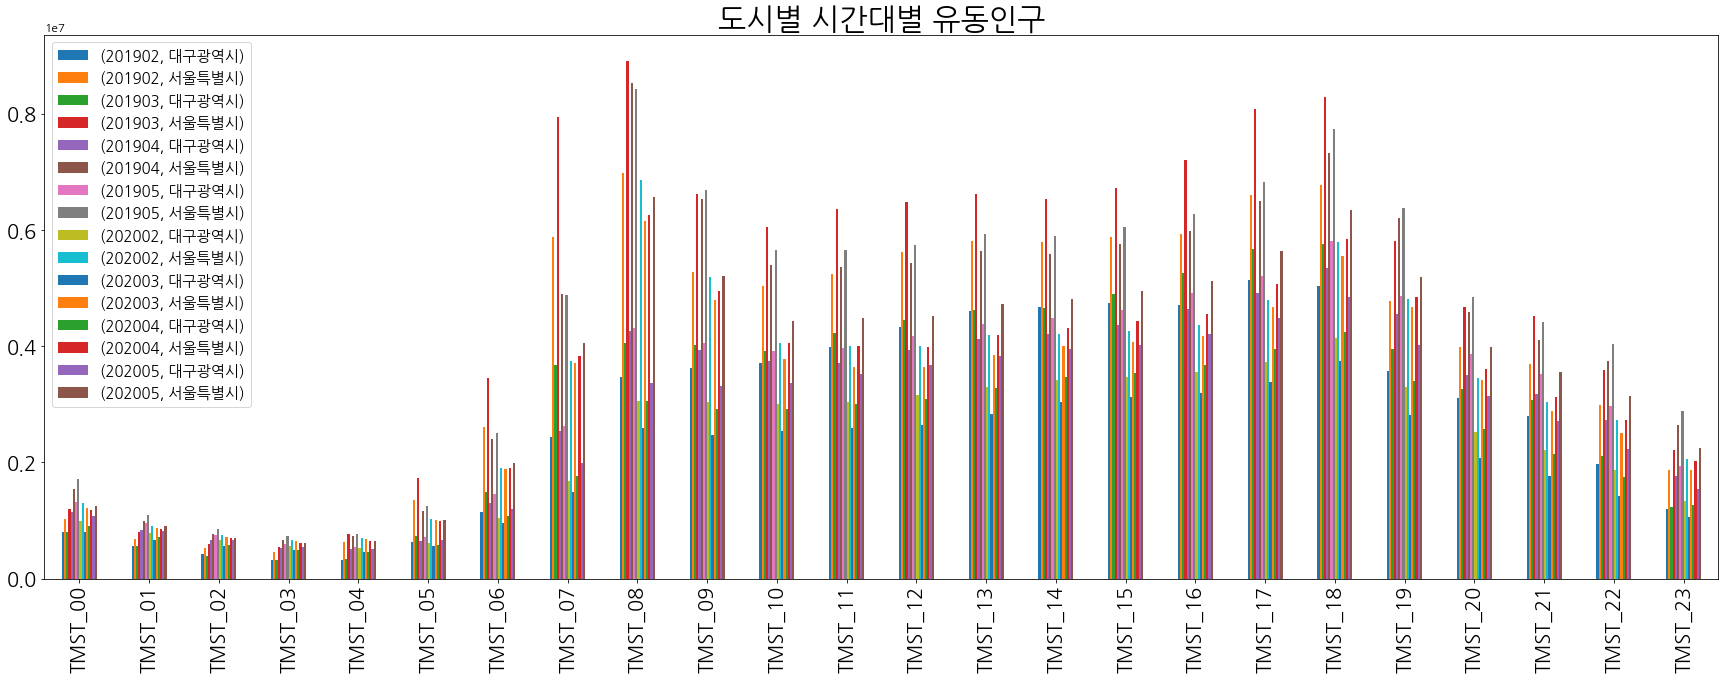

In [60]:
sk_month_move.T.plot(kind = 'bar')
plt.title('도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

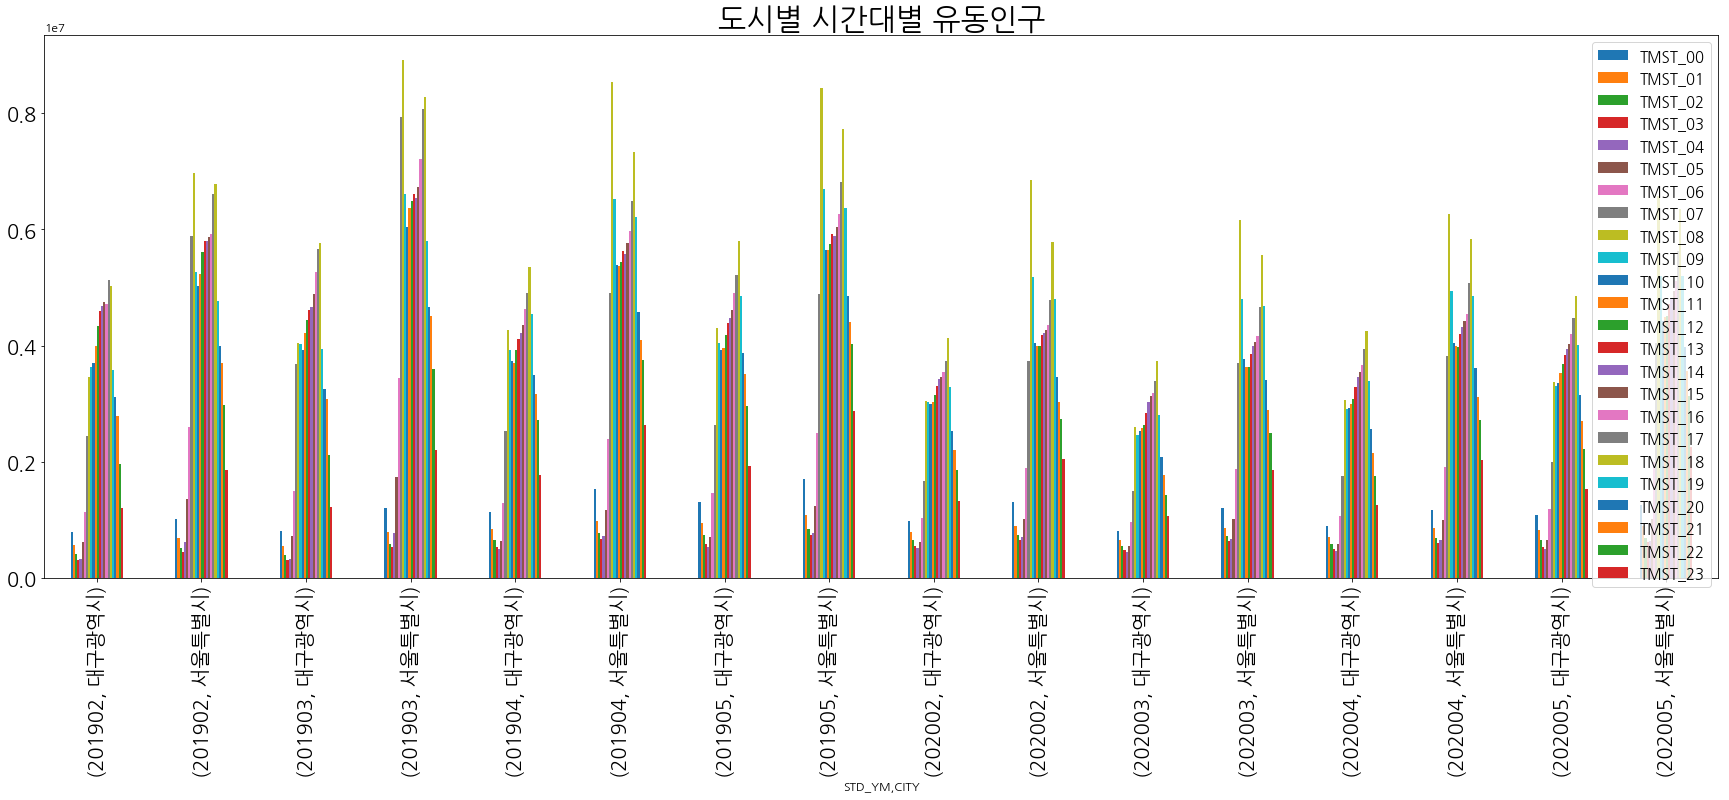

In [61]:
sk_month_move.plot(kind = 'bar')
plt.title('도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

In [220]:
# 서울특별시와 대구광역시 시간별 데이터 나누기

DAEGU_move_per_time = sk_month_move.T.iloc[:, [0, 2, 4, 6, 8, 10, 12, 14]]
SEOUL_move_per_time = sk_month_move.T.iloc[:, [1, 3, 5, 7, 9, 11, 13, 15]]

In [221]:
for i in sk_month_move.T.max(axis = 1):
    index = list(np.where(sk_month_move.T == i))
    
    row_idx = sk_month_move.T.index[index[0]]
    col_idx = sk_month_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 큰 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.max(axis = 0).idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 유동인구가 가장 많은 시간은 {SEOUL_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {SEOUL_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'대구광역시에서 유동인구가 가장 많은 시간은 {DAEGU_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {DAEGU_move_per_time.max(axis = 0).idxmax()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_01시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_02시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_03시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_04시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_05시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_06시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_07시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_08시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_09시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_10시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_11시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_12시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_13시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_14시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_15시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_16시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_17시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_18시의 유동인구 값중 가장 큰 값은 (201903, '서울특별시')입니다
TMST_19시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_20시의 유동인구 값중 가장 큰 값은 (201905, '서울특별시')입니다
TMST_21시의 유동인

In [222]:
for i in sk_month_move.T.min(axis = 1):
    index = list(np.where(sk_month_move.T == i))
    
    row_idx = sk_month_move.T.index[index[0]]
    col_idx = sk_month_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 작은 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 유동인구가 가장 적은 시간은 {SEOUL_move_per_time.min(axis = 1).idxmin()}이며, 시점은 {SEOUL_move_per_time.min(axis = 0).idxmin()[0]}입니다.')
print(f'대구광역시에서 유동인구가 가장 적은 시간은 {DAEGU_move_per_time.min(axis = 1).idxmin()}이며, 시점은 {DAEGU_move_per_time.min(axis = 0).idxmin()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 작은 값은 (201902, '대구광역시')입니다
TMST_01시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시')입니다
TMST_02시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시')입니다
TMST_03시의 유동인구 값중 가장 작은 값은 (201903, '대구광역시')입니다
TMST_04시의 유동인구 값중 가장 작은 값은 (201902, '대구광역시')입니다
TMST_05시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_06시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_07시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_08시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_09시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_10시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_11시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_12시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_13시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_14시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_15시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_16시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_17시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_18시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_19시의 유동인구 값중 가장 작은 값은 (202003, '대구광역시')입니다
TMST_20시의 유동인구 값중 가장 작은 값은 (202003, '대구광

### - 일반적으로 서울시의 유동인구가 대구시보다 많고, 출근시간인 7-9시와 퇴근시간인 17-19시가 다른 시간대보다 유동인구가 많은것을 볼 수 있음.

### 1-2. 월별 도시별 유동인구 (세부)

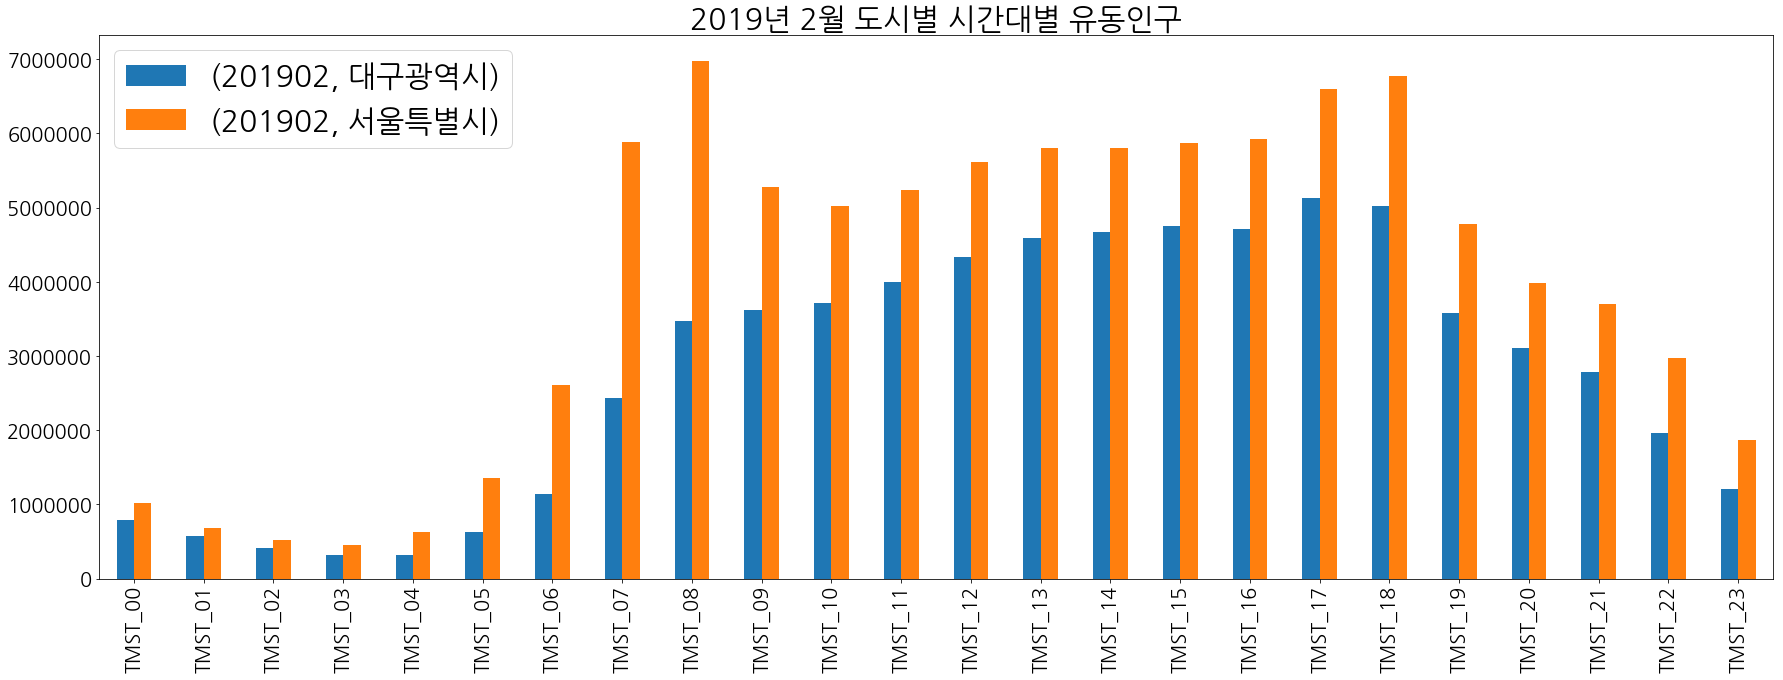

In [62]:
sk_month_move.T.iloc[:, 0:2].plot(kind = 'bar')
plt.title('2019년 2월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [225]:
sk_month_move.T.iloc[:, end - 1].idxmax()

'TMST_08'

In [229]:
start = 0
end = 2
YM = '2019년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201902, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (201902, '대구광역시')입니다.
서울특별시에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_17입니다.
서울특별시에서 2019년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.


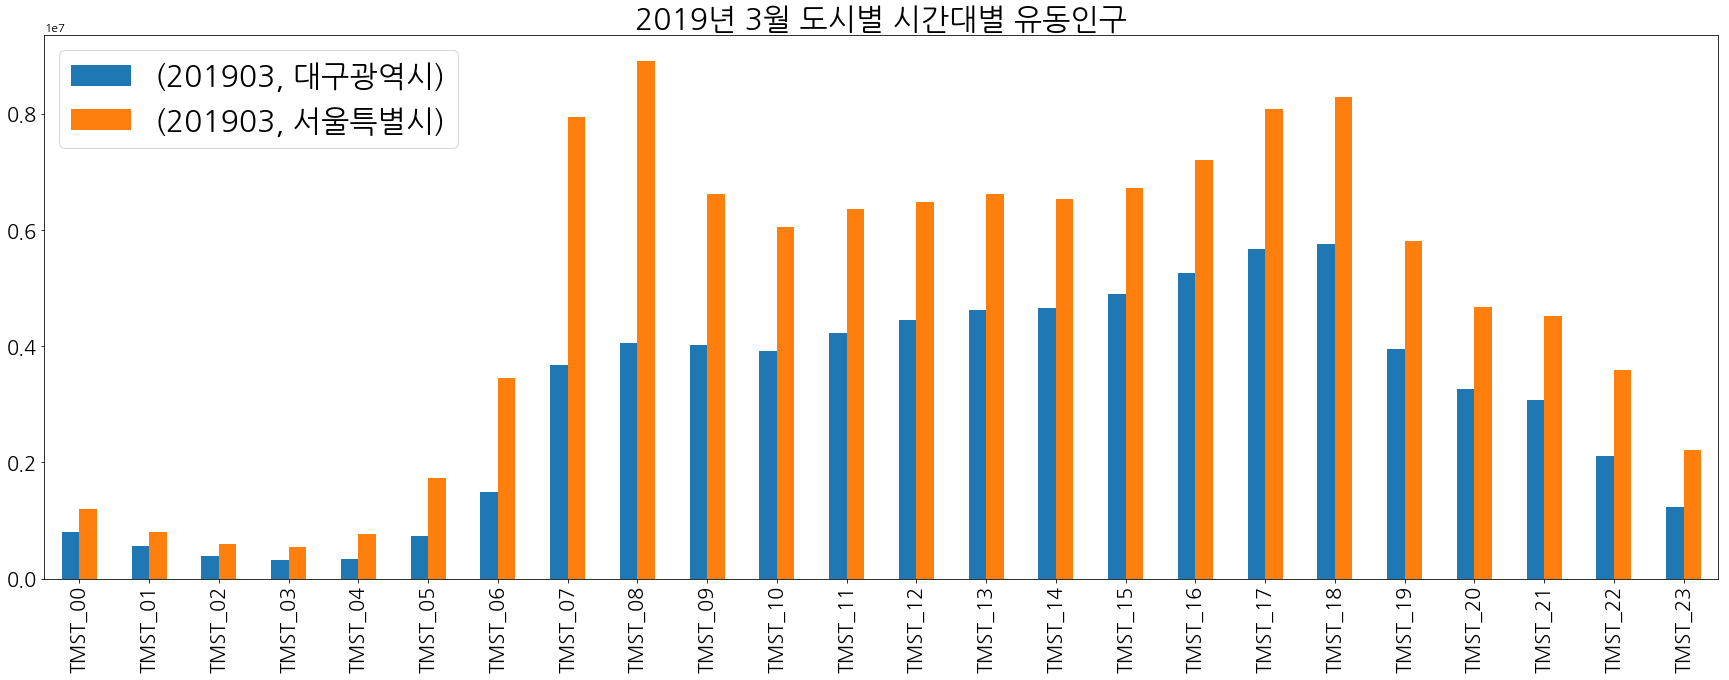

In [63]:
sk_month_move.T.iloc[:, 2:4].plot(kind = 'bar')
plt.title('2019년 3월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [230]:
start = 2
end = 4
YM = '2019년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201903, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (201903, '대구광역시')입니다.
서울특별시에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2019년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.


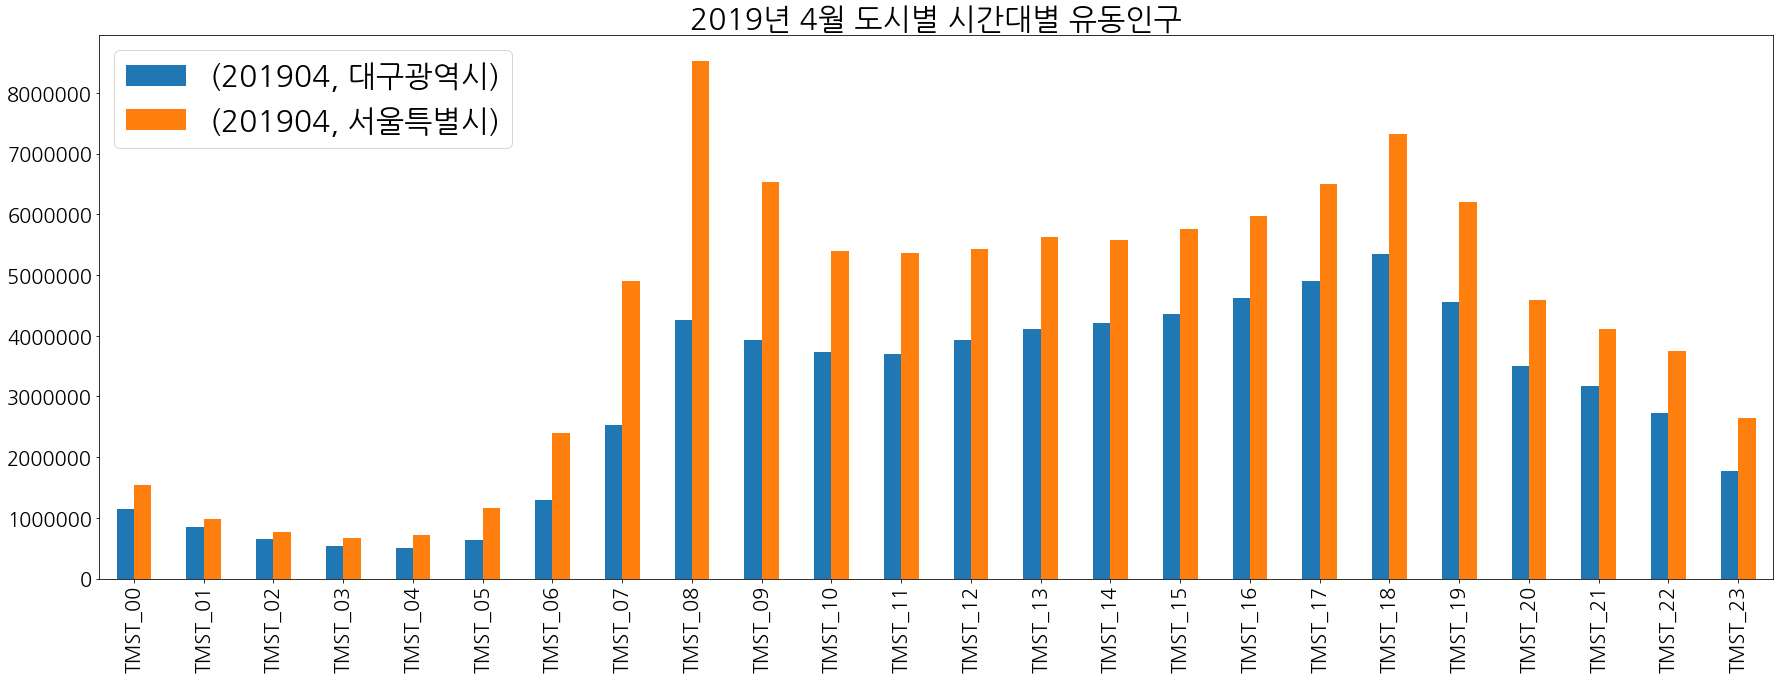

In [64]:
sk_month_move.T.iloc[:, 4:6].plot(kind = 'bar')
plt.title('2019년 4월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [231]:
start = 4
end = 6
YM = '2019년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201904, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201904, '대구광역시')입니다.
서울특별시에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2019년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 4월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


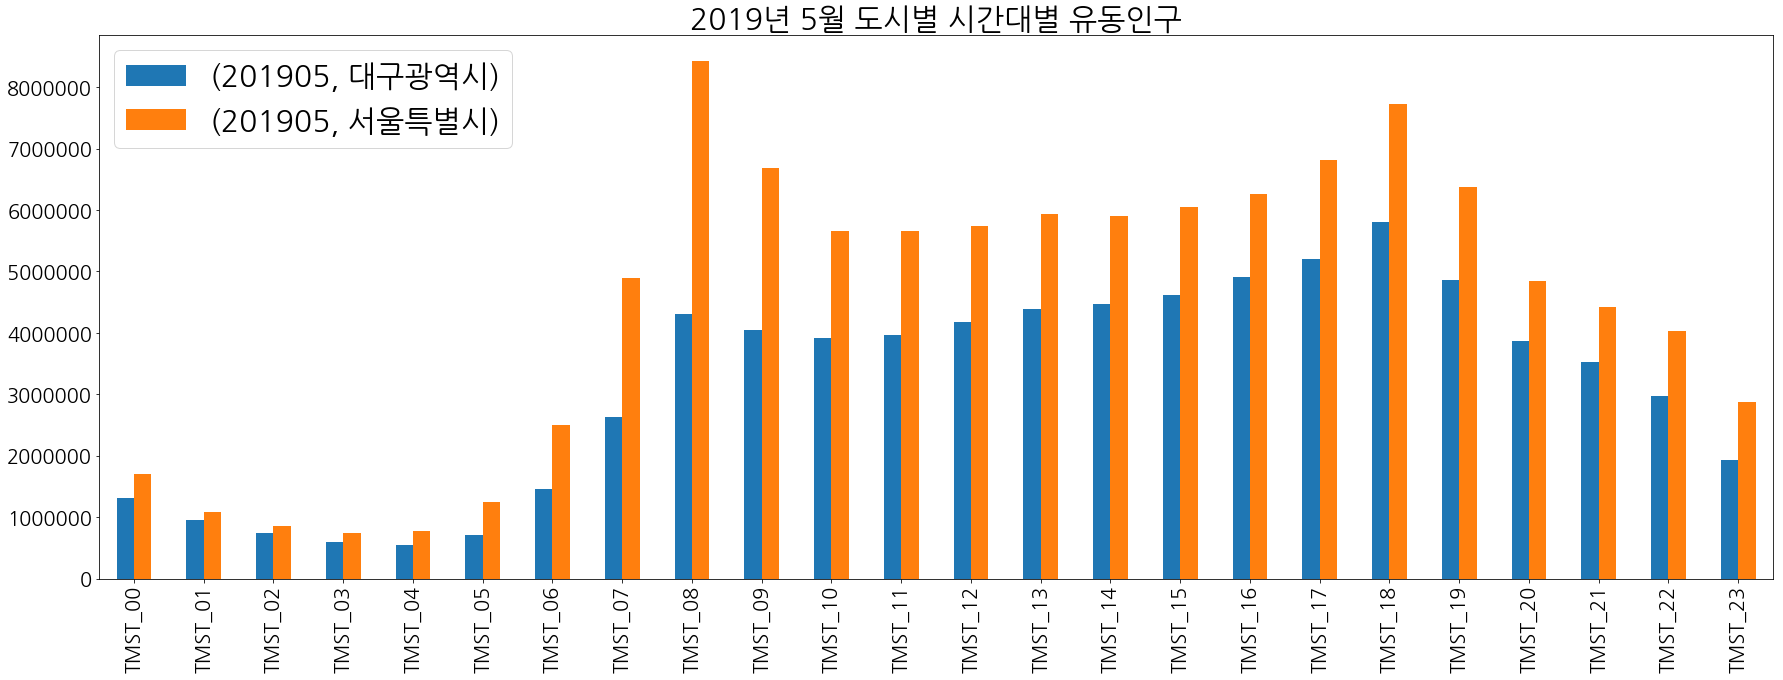

In [65]:
sk_month_move.T.iloc[:, 6:8].plot(kind = 'bar')
plt.title('2019년 5월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [232]:
start = 6
end = 8
YM = '2019년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201905, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201905, '대구광역시')입니다.
서울특별시에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2019년 5월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2019년 5월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


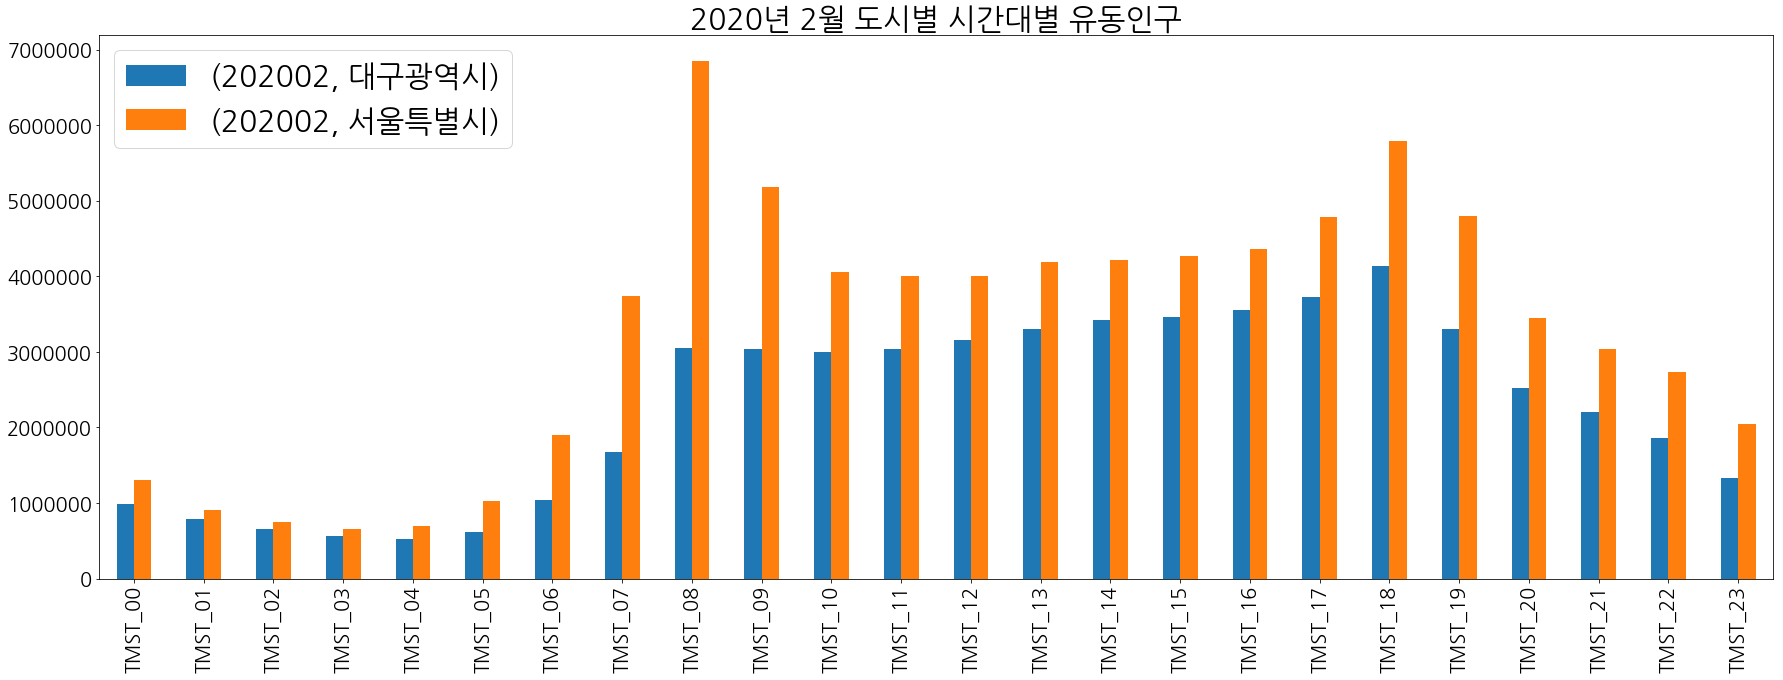

In [66]:
sk_month_move.T.iloc[:, 8:10].plot(kind = 'bar')
plt.title('2020년 2월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [233]:
start = 8
end = 10
YM = '2020년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202002, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202002, '대구광역시')입니다.
서울특별시에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 2월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


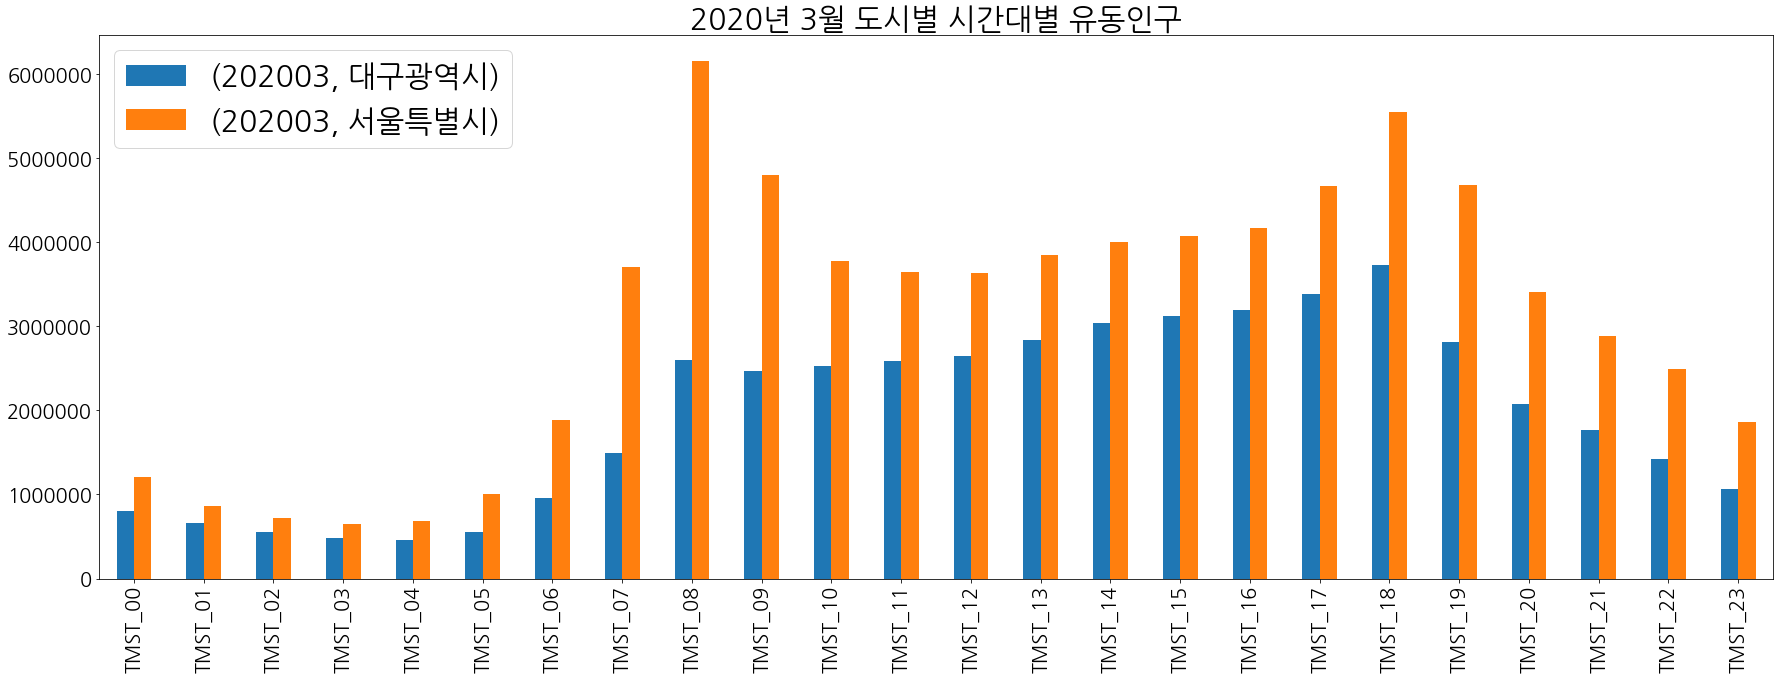

In [67]:
sk_month_move.T.iloc[:, 10:12].plot(kind = 'bar')
plt.title('2020년 3월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [234]:
start = 10
end = 12
YM = '2020년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202003, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202003, '대구광역시')입니다.
서울특별시에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 3월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


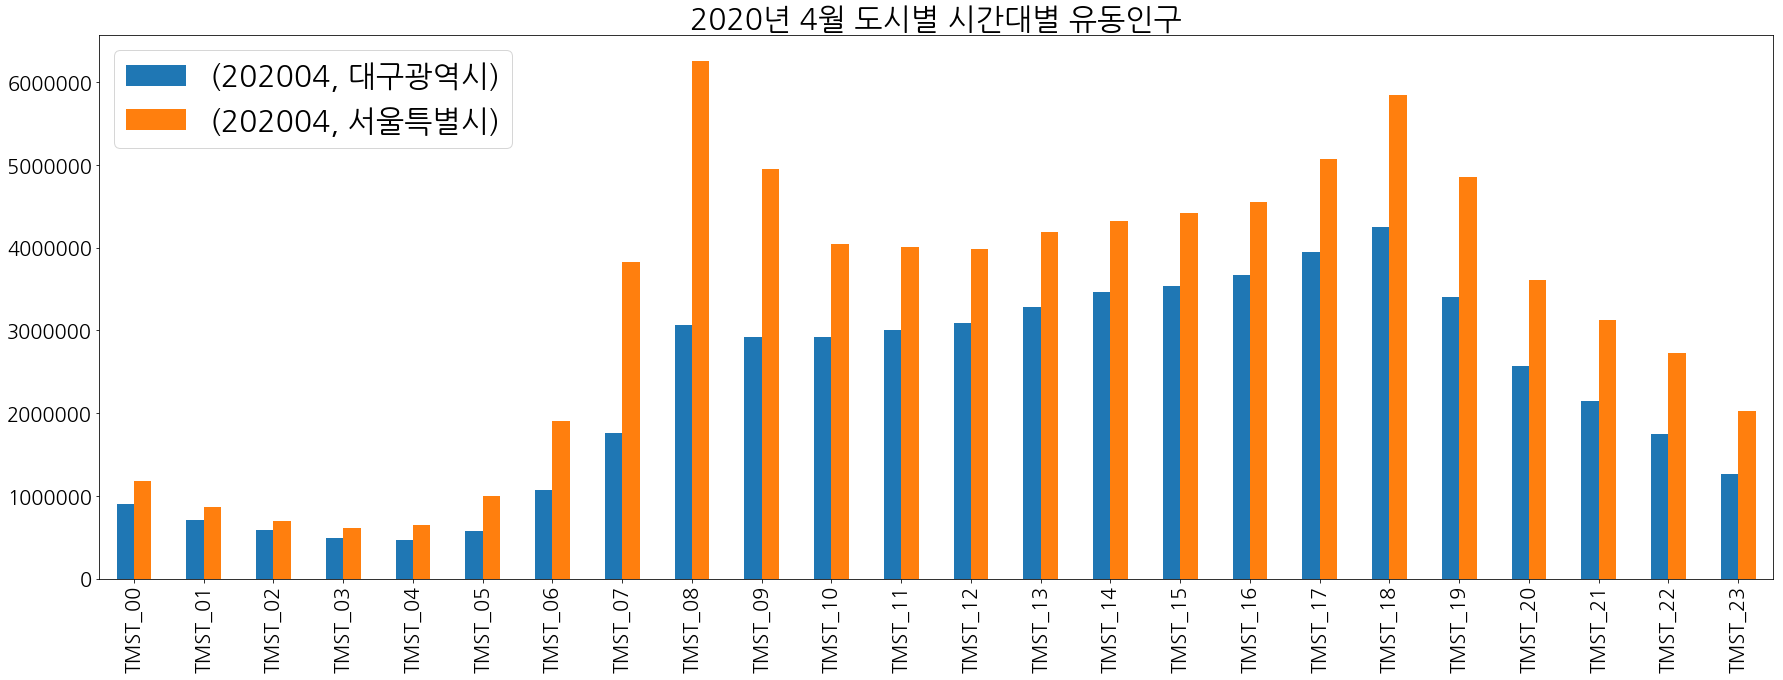

In [68]:
sk_month_move.T.iloc[:, 12:14].plot(kind = 'bar')
plt.title('2020년 4월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [235]:
start = 12
end = 14
YM = '2020년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202004, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202004, '대구광역시')입니다.
서울특별시에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 4월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


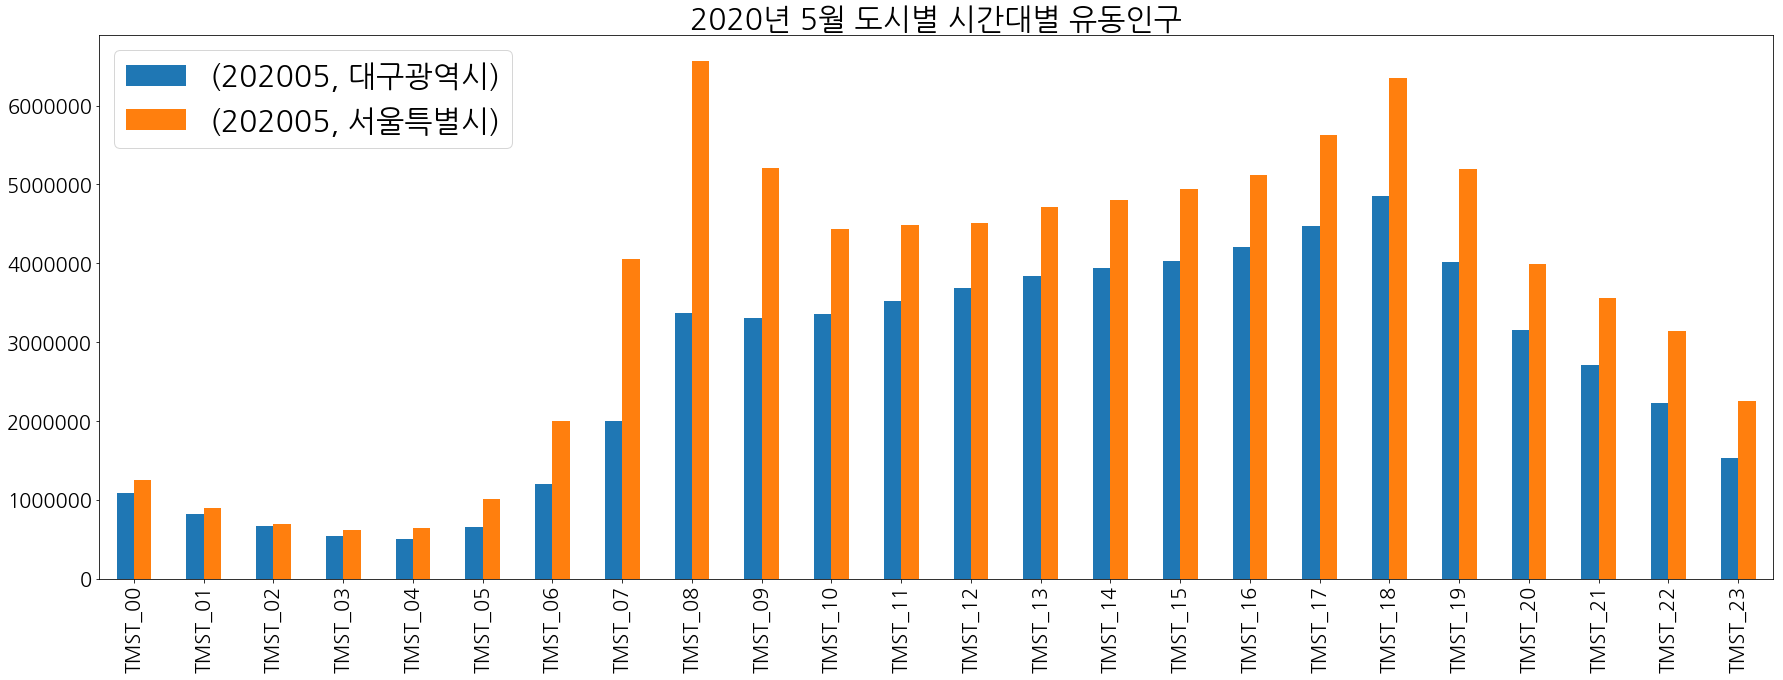

In [69]:
sk_month_move.T.iloc[:, 14:16].plot(kind = 'bar')
plt.title('2020년 5월 도시별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [236]:
start = 14
end = 16
YM = '2020년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_move.T.iloc[:, start].idxmax()}입니다.')

print('===============================================================================')

print(f'서울특별시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'대구광역시에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_move.T.iloc[:, start].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202005, '서울특별시')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202005, '대구광역시')입니다.
서울특별시에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
대구광역시에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
서울특별시에서 2020년 5월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
대구광역시에서 2020년 5월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


## 2-1. 구별 시간대별 유동인구

In [70]:
sk_month_GU_move = sk_data_TIME.groupby([sk_data_TIME['STD_YM'], sk_data_TIME['GU_NAME']]).sum().iloc[:, 2:]

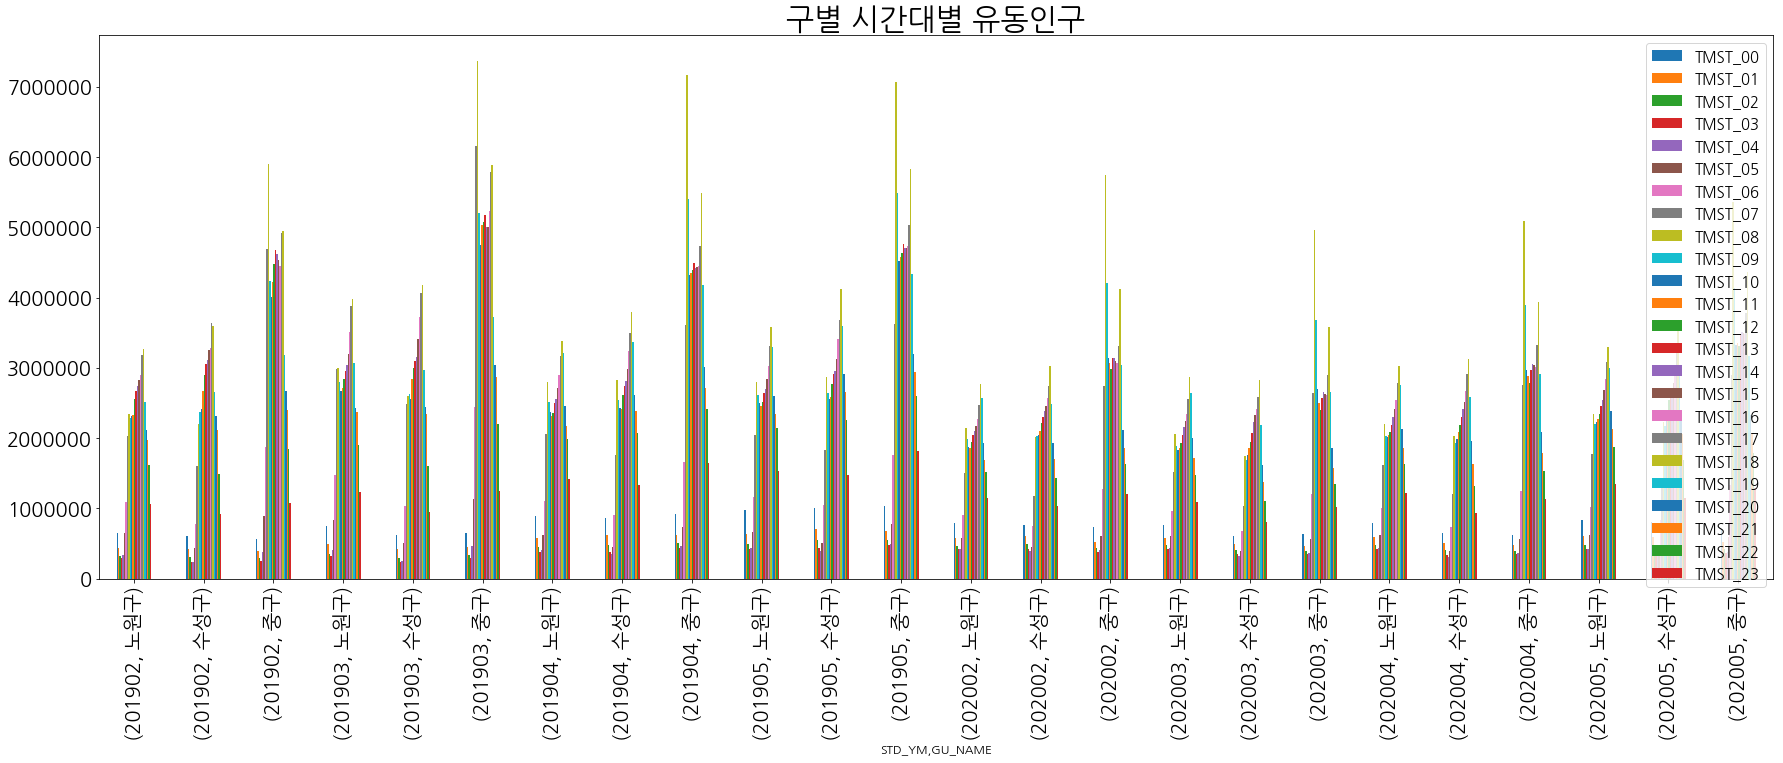

In [71]:
sk_month_GU_move.plot(kind = 'bar')
plt.title('구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

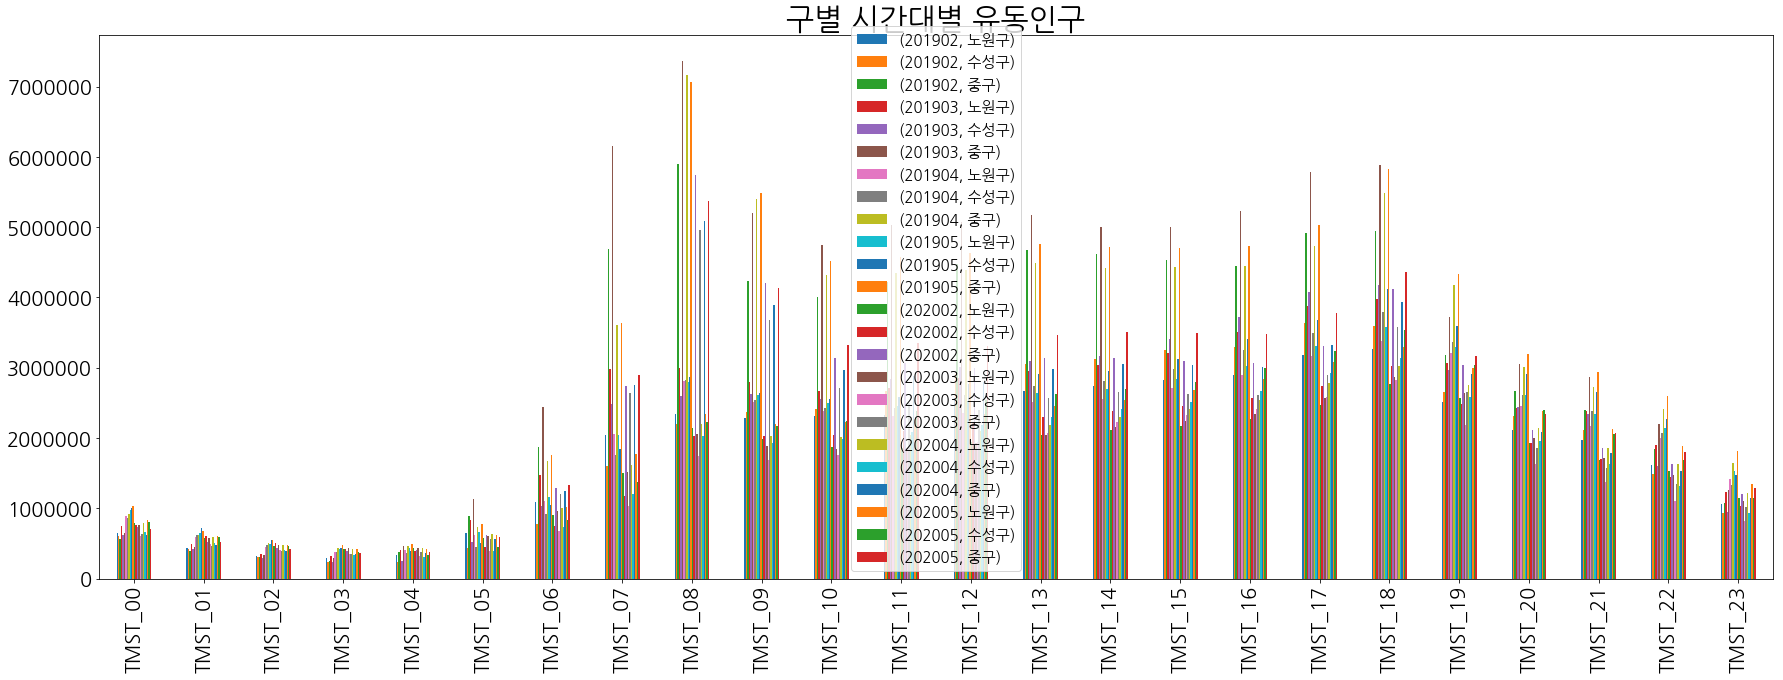

In [72]:
sk_month_GU_move.T.plot(kind = 'bar')
plt.title('구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 15)

In [243]:
NOWON_move_per_time = sk_month_GU_move.T.iloc[:, [0, 3, 6, 9, 12, 15, 18, 21]]
SUSUNG_move_per_time = sk_month_GU_move.T.iloc[:, [1, 4, 7, 10, 13, 16, 19, 22]]
JUNGGU_move_per_time = sk_month_GU_move.T.iloc[:, [2, 5, 8, 11, 14, 17, 20, 23]]

In [244]:
for i in sk_month_GU_move.T.max(axis = 1):
    index = list(np.where(sk_month_GU_move.T == i))
    
    row_idx = sk_month_GU_move.T.index[index[0]]
    col_idx = sk_month_GU_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 큰 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.max(axis = 0).idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 유동인구가 가장 많은 시간은 {NOWON_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {NOWON_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'수성구에서 유동인구가 가장 많은 시간은 {SUSUNG_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {SUSUNG_move_per_time.max(axis = 0).idxmax()[0]}입니다.')
print(f'중구에서 유동인구가 가장 많은 시간은 {JUNGGU_move_per_time.max(axis = 1).idxmax()}이며, 시점은 {JUNGGU_move_per_time.max(axis = 0).idxmax()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_01시의 유동인구 값중 가장 큰 값은 (201905, '수성구')입니다
TMST_02시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_03시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_04시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_05시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_06시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_07시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_08시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_09시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_10시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_11시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_12시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_13시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_14시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_15시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_16시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_17시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_18시의 유동인구 값중 가장 큰 값은 (201903, '중구')입니다
TMST_19시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_20시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_21시의 유동인구 값중 가장 큰 값은 (201905, '중구')입니다
TMST_22시의 유동인구 값중 가장 큰 값은 (2019

In [245]:
for i in sk_month_GU_move.T.min(axis = 1):
    index = list(np.where(sk_month_GU_move.T == i))
    
    row_idx = sk_month_GU_move.T.index[index[0]]
    col_idx = sk_month_GU_move.T.columns[index[1]][0]
    
    print(f'{row_idx[0]}시의 유동인구 값중 가장 작은 값은 {col_idx}입니다')
    
print('===============================================================================')

print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.min(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.min(axis = 0).idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 유동인구가 가장 적은 시간은 {NOWON_move_per_time.min(axis = 1).idxmin()}이며, 시점은 {NOWON_move_per_time.min(axis = 0).idxmin()[0]}입니다.')
print(f'수성구에서 유동인구가 가장 적은 시간은 {SUSUNG_move_per_time.min(axis = 1).idxmin()}이며, 시점은 {SUSUNG_move_per_time.min(axis = 0).idxmin()[0]}입니다.')
print(f'중구에서 유동인구가 가장 적은 시간은 {JUNGGU_move_per_time.min(axis = 1).idxmin()}이며, 시점은 {JUNGGU_move_per_time.min(axis = 0).idxmin()[0]}입니다.')

TMST_00시의 유동인구 값중 가장 작은 값은 (201902, '중구')입니다
TMST_01시의 유동인구 값중 가장 작은 값은 (201902, '중구')입니다
TMST_02시의 유동인구 값중 가장 작은 값은 (201903, '수성구')입니다
TMST_03시의 유동인구 값중 가장 작은 값은 (201903, '수성구')입니다
TMST_04시의 유동인구 값중 가장 작은 값은 (201902, '수성구')입니다
TMST_05시의 유동인구 값중 가장 작은 값은 (202004, '수성구')입니다
TMST_06시의 유동인구 값중 가장 작은 값은 (202003, '수성구')입니다
TMST_07시의 유동인구 값중 가장 작은 값은 (202003, '수성구')입니다
TMST_08시의 유동인구 값중 가장 작은 값은 (202003, '수성구')입니다
TMST_09시의 유동인구 값중 가장 작은 값은 (202003, '수성구')입니다
TMST_10시의 유동인구 값중 가장 작은 값은 (202003, '수성구')입니다
TMST_11시의 유동인구 값중 가장 작은 값은 (202003, '노원구')입니다
TMST_12시의 유동인구 값중 가장 작은 값은 (202003, '노원구')입니다
TMST_13시의 유동인구 값중 가장 작은 값은 (202003, '노원구')입니다
TMST_14시의 유동인구 값중 가장 작은 값은 (202002, '노원구')입니다
TMST_15시의 유동인구 값중 가장 작은 값은 (202002, '노원구')입니다
TMST_16시의 유동인구 값중 가장 작은 값은 (202002, '노원구')입니다
TMST_17시의 유동인구 값중 가장 작은 값은 (202002, '노원구')입니다
TMST_18시의 유동인구 값중 가장 작은 값은 (202002, '노원구')입니다
TMST_19시의 유동인구 값중 가장 작은 값은 (202003, '수성구')입니다
TMST_20시의 유동인구 값중 가장 작은 값은 (202003, '수성구')입니다
TMST_21시의 유동인구 값중 가장 작은 값은 (202003, 

### - 일반적으로 중구 > 수성구 > 노원구 순으로 유동인구가 많은 것으로 보임

### 2-2. 구별 시간대별 유동인구 (세부)

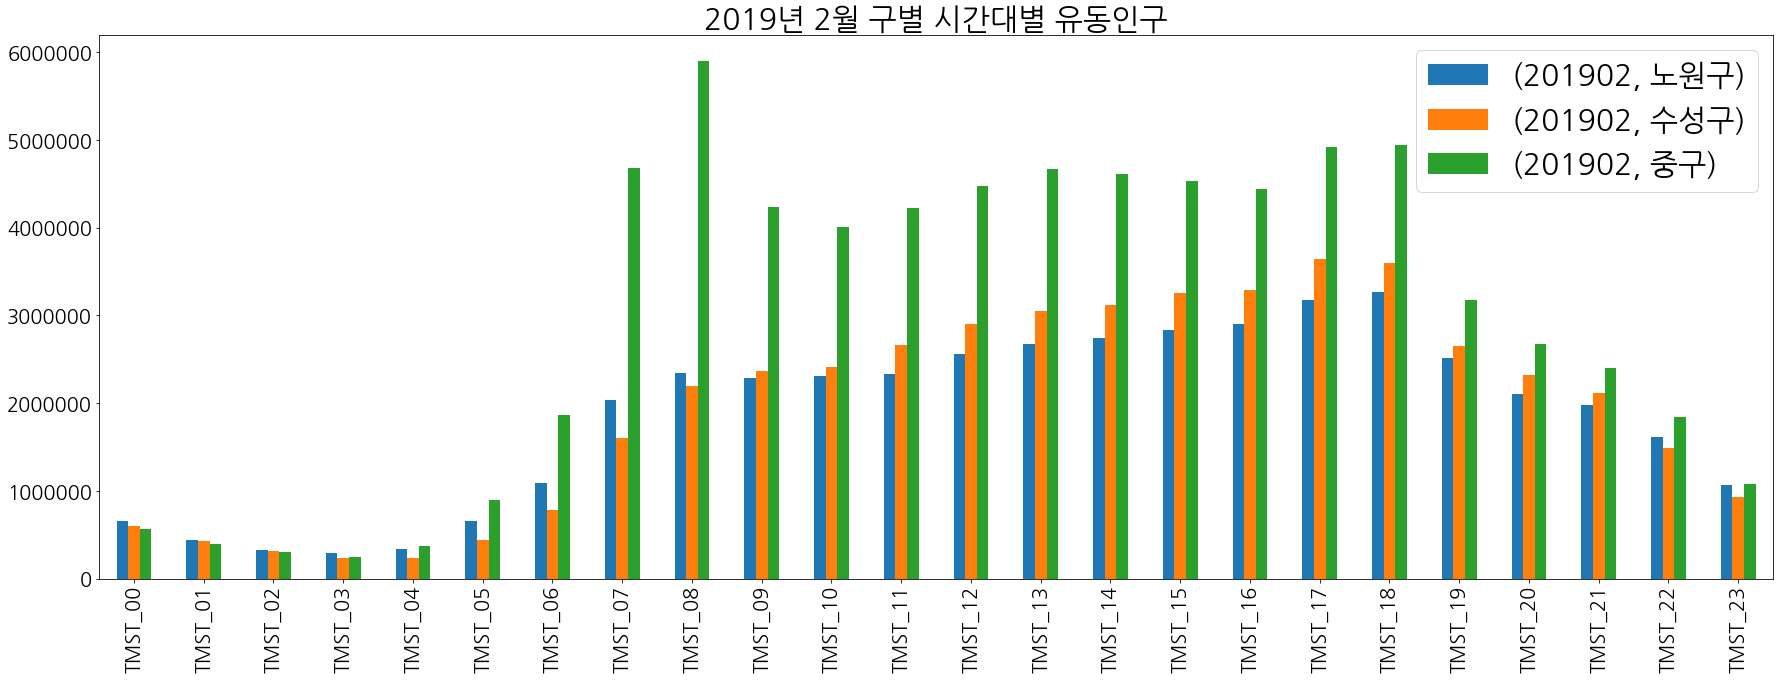

In [73]:
sk_month_GU_move.T.iloc[:, 0:3].plot(kind = 'bar')
plt.title('2019년 2월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [260]:
start = 0
end = 3
YM = '2019년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201902, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201902, '수성구')입니다.
노원구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2019년 2월시점에 유동인구가 가장 많은 시간은 TMST_17입니다.
노원구에서 2019년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
수성구에서 2019년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2019년 2월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


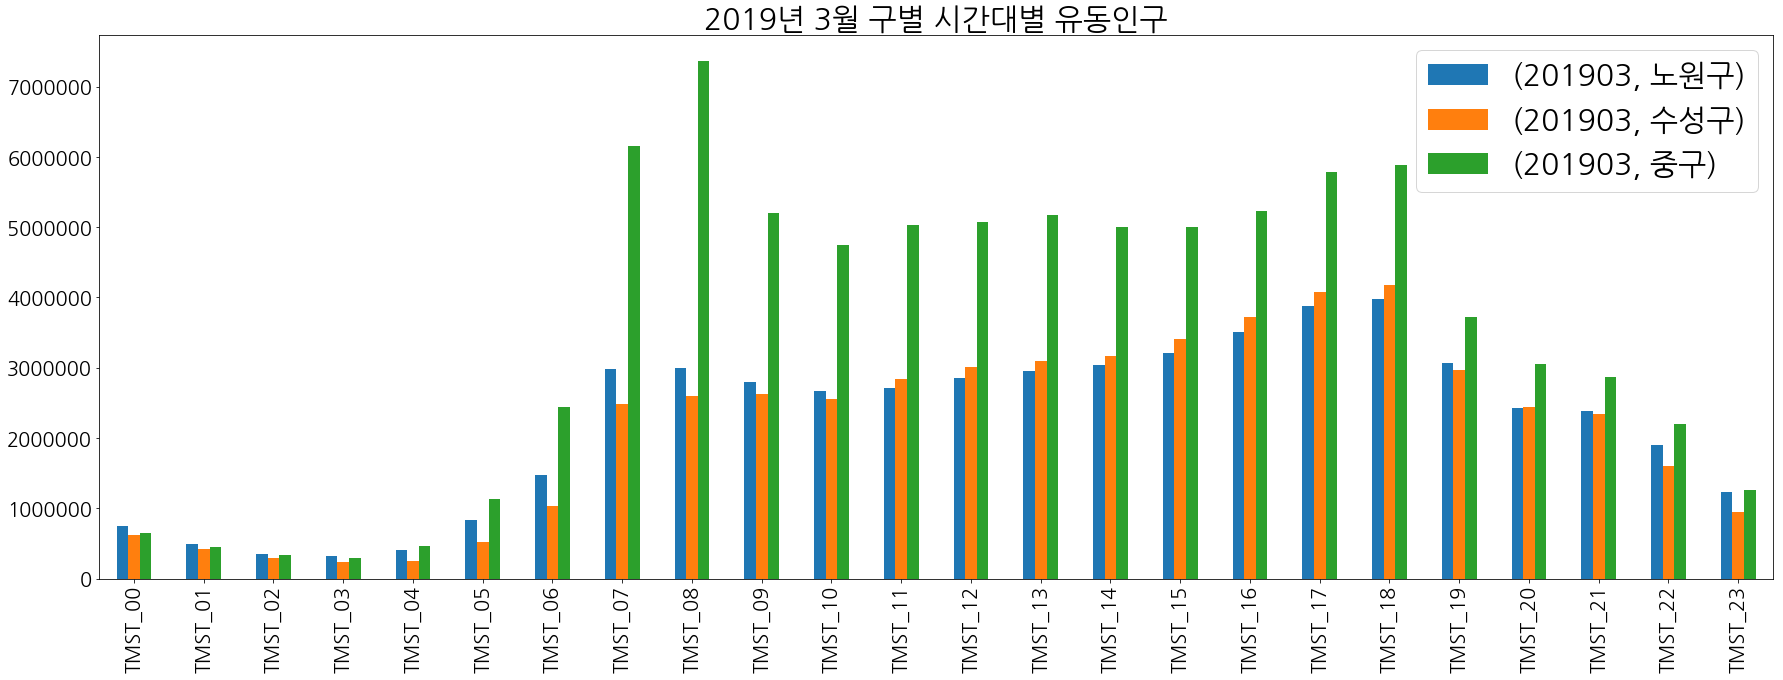

In [74]:
sk_month_GU_move.T.iloc[:, 3:6].plot(kind = 'bar')
plt.title('2019년 3월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [259]:
start = 3
end = 6
YM = '2019년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201903, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (201903, '수성구')입니다.
노원구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2019년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2019년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
수성구에서 2019년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2019년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.


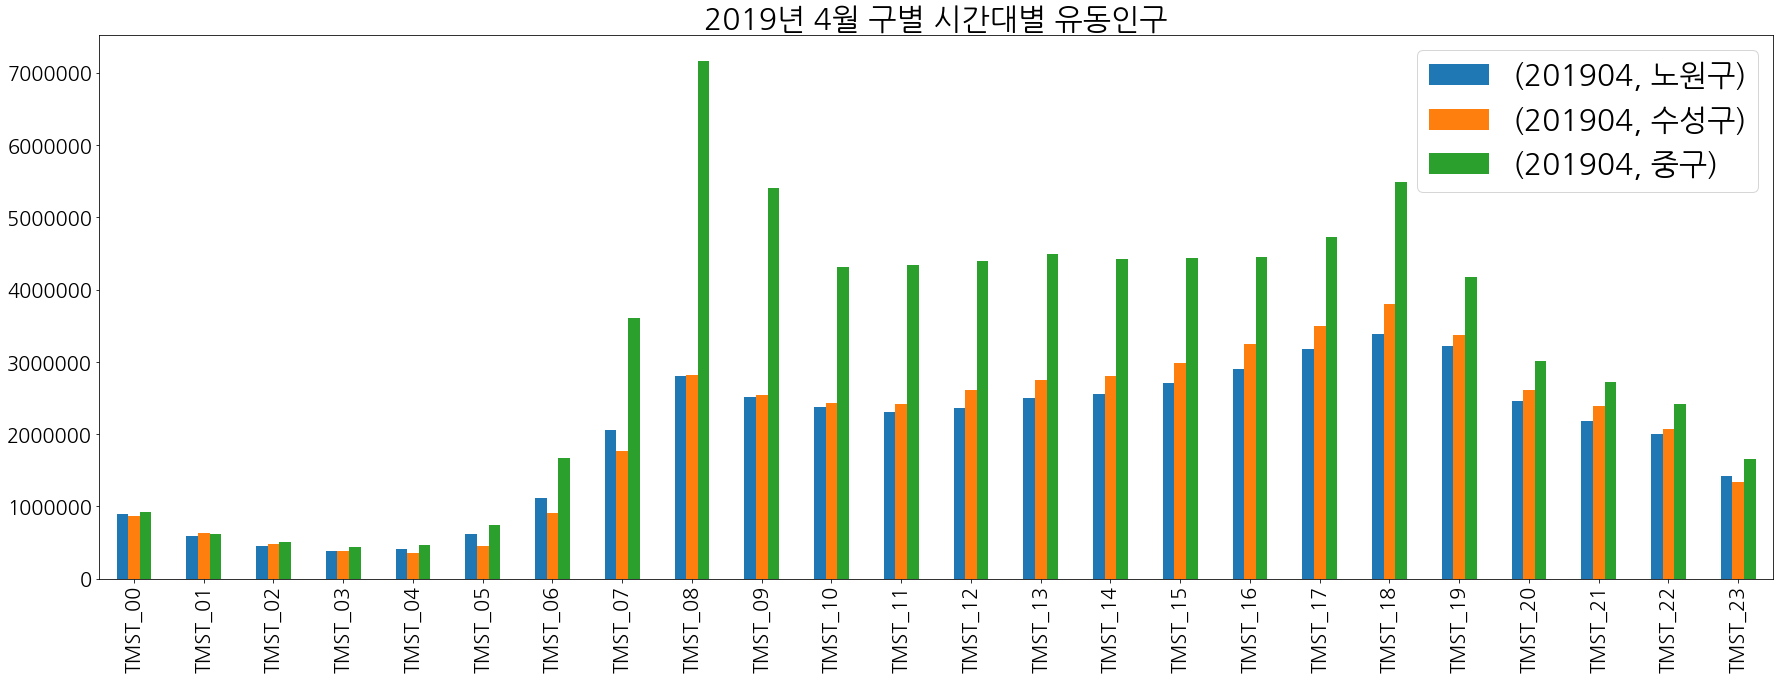

In [75]:
sk_month_GU_move.T.iloc[:, 6:9].plot(kind = 'bar')
plt.title('2019년 4월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [258]:
start = 6
end = 9
YM = '2019년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201904, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201904, '수성구')입니다.
노원구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2019년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2019년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
수성구에서 2019년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2019년 4월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


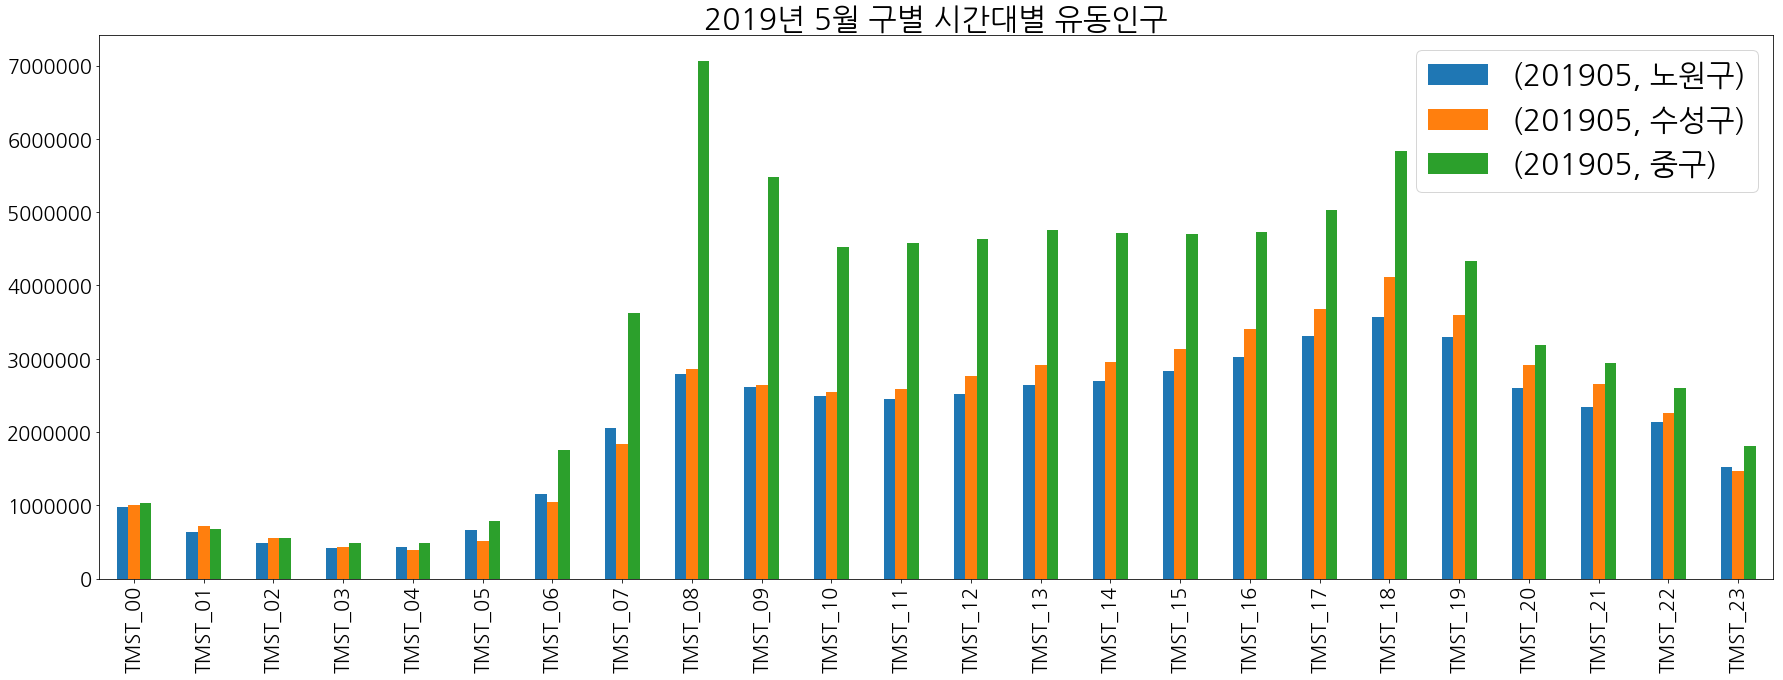

In [76]:
sk_month_GU_move.T.iloc[:, 9:12].plot(kind = 'bar')
plt.title('2019년 5월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [257]:
start = 9
end = 12
YM = '2019년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (201905, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (201905, '수성구')입니다.
노원구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2019년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2019년 5월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
수성구에서 2019년 5월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2019년 5월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


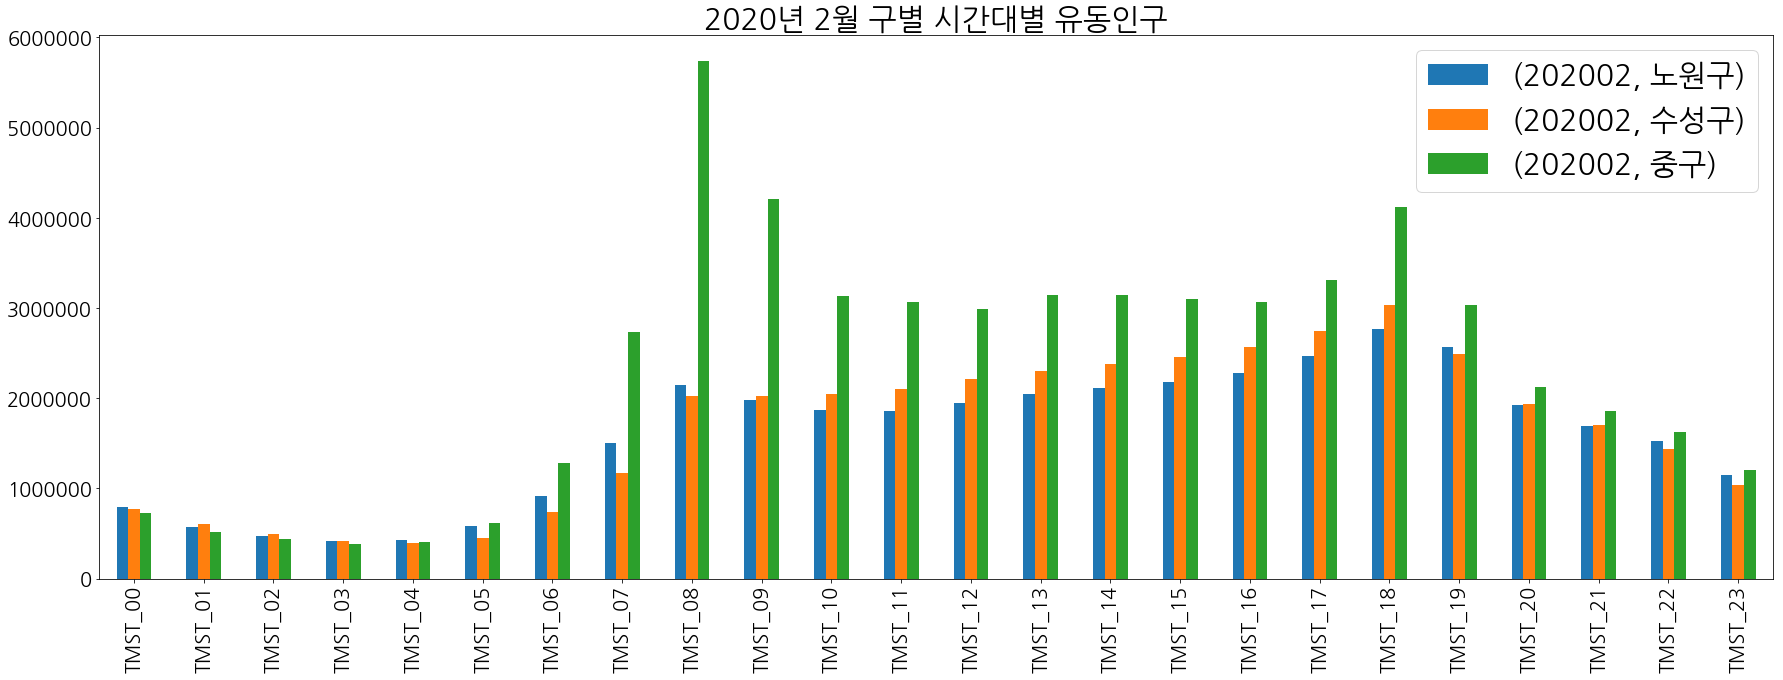

In [77]:
sk_month_GU_move.T.iloc[:, 12:15].plot(kind = 'bar')
plt.title('2020년 2월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [256]:
start = 12
end = 15
YM = '2020년 2월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202002, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_03이며, 시점과 도시는 (202002, '중구')입니다.
노원구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2020년 2월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
수성구에서 2020년 2월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2020년 2월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


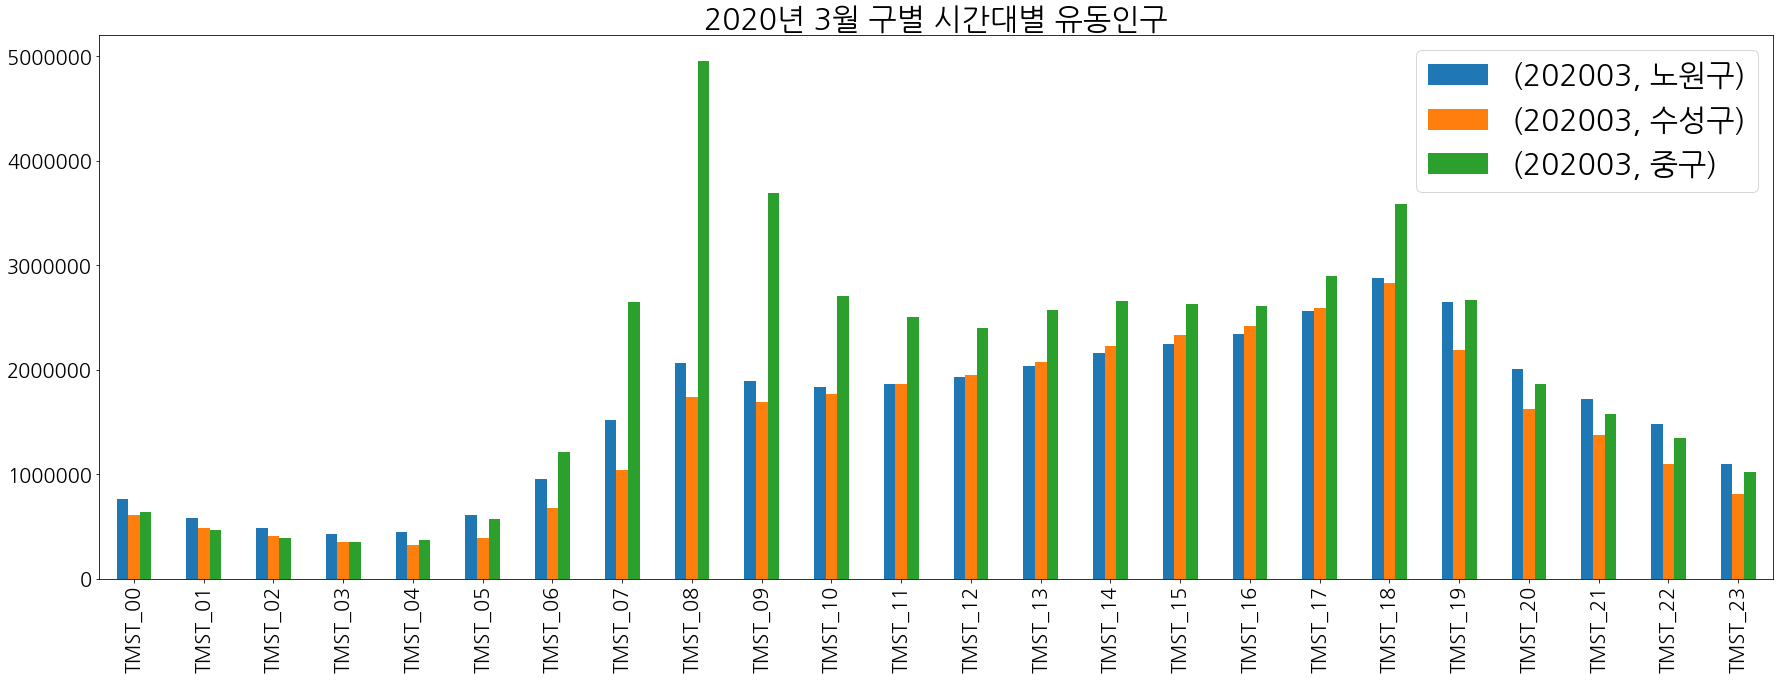

In [78]:
sk_month_GU_move.T.iloc[:, 15:18].plot(kind = 'bar')
plt.title('2020년 3월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [255]:
start = 15
end = 18
YM = '2020년 3월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202003, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202003, '수성구')입니다.
노원구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2020년 3월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
수성구에서 2020년 3월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2020년 3월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


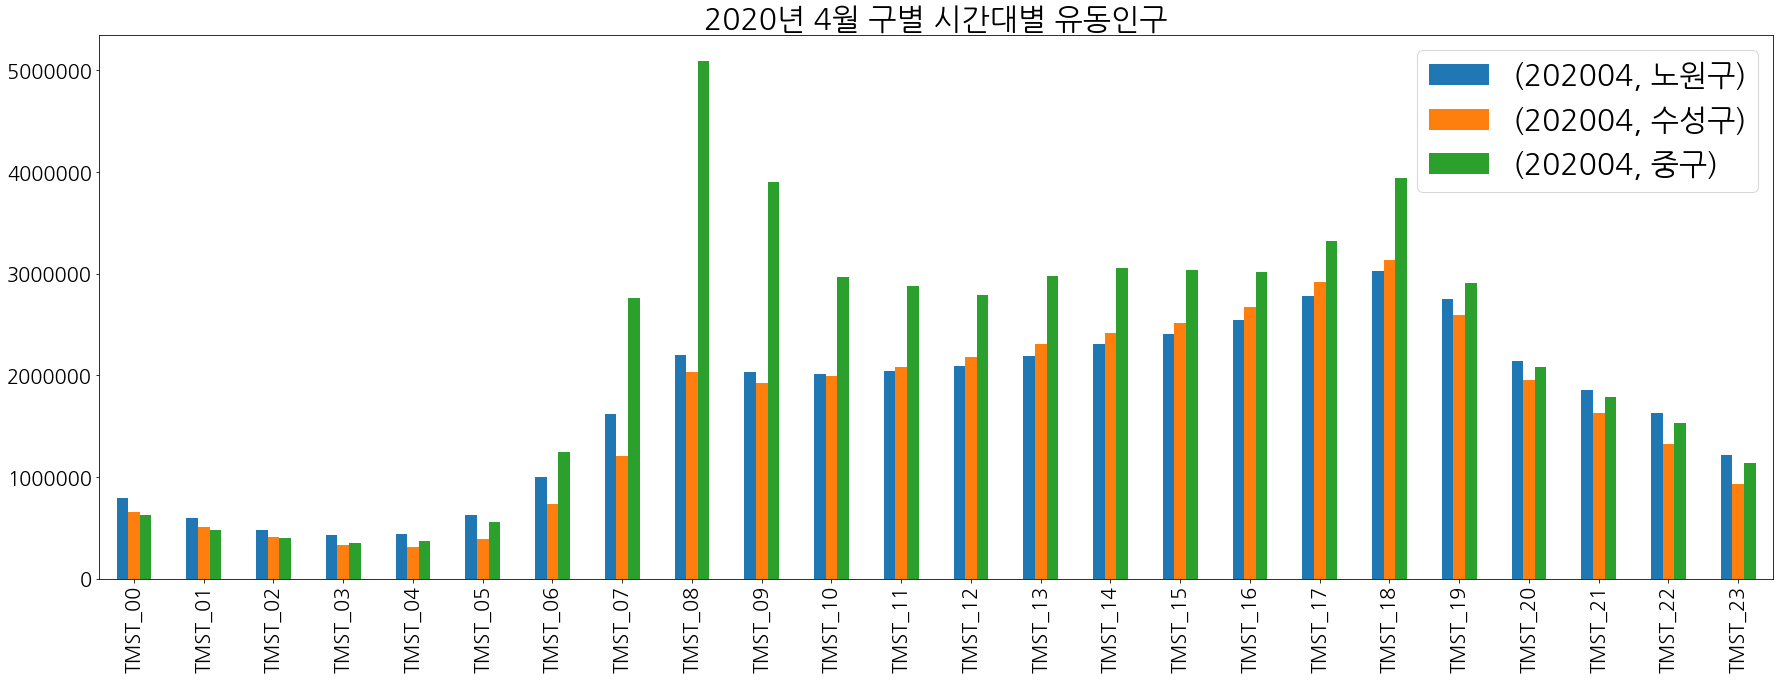

In [79]:
sk_month_GU_move.T.iloc[:, 18:21].plot(kind = 'bar')
plt.title('2020년 4월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [261]:
start = 18
end = 21
YM = '2020년 4월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202004, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202004, '수성구')입니다.
노원구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2020년 4월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
수성구에서 2020년 4월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2020년 4월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


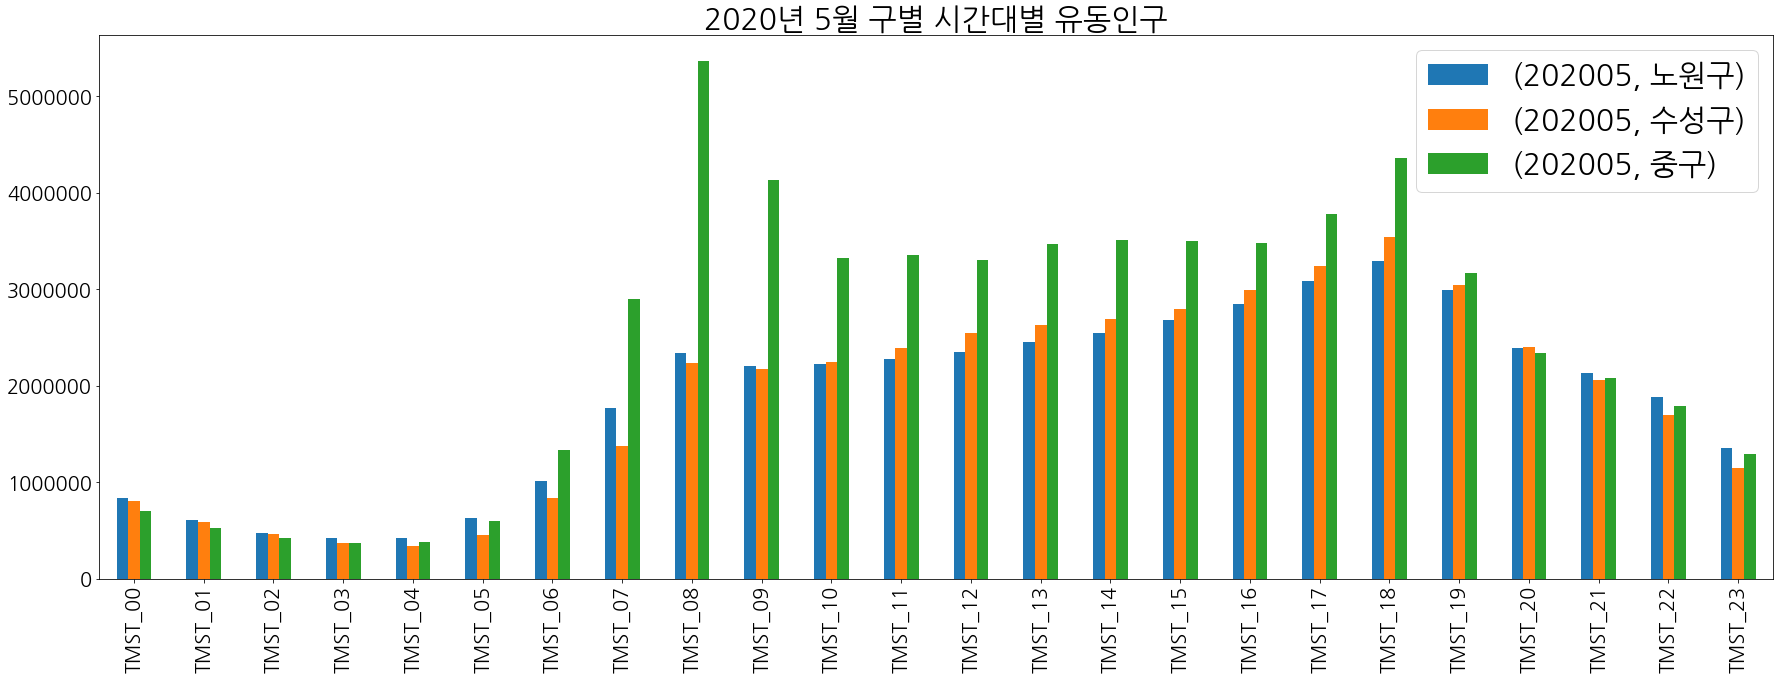

In [80]:
sk_month_GU_move.T.iloc[:, 21:24].plot(kind = 'bar')
plt.title('2020년 5월 구별 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [262]:
start = 21
end = 24
YM = '2020년 5월'

print(f'유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 1).idxmax()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].max(axis = 0).idxmax()}입니다.')
print(f'유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 1).idxmin()}이며, 시점과 도시는 {sk_month_GU_move.T.iloc[:, start:end].min(axis = 0).idxmin()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmax()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmax()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 많은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmax()}입니다.')

print('===============================================================================')

print(f'노원구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, start].idxmin()}입니다.')
print(f'수성구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 1].idxmin()}입니다.')
print(f'중구에서 {YM}시점에 유동인구가 가장 적은 시간은 {sk_month_GU_move.T.iloc[:, end - 2].idxmin()}입니다.')

유동인구가 가장 많은 시간은 TMST_08이며, 시점과 도시는 (202005, '중구')입니다.
유동인구가 가장 적은 시간은 TMST_04이며, 시점과 도시는 (202005, '수성구')입니다.
노원구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
수성구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_08입니다.
중구에서 2020년 5월시점에 유동인구가 가장 많은 시간은 TMST_18입니다.
노원구에서 2020년 5월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.
수성구에서 2020년 5월시점에 유동인구가 가장 적은 시간은 TMST_03입니다.
중구에서 2020년 5월시점에 유동인구가 가장 적은 시간은 TMST_04입니다.


## 3-1. 코로나 전후 유동인구 비교

#### 대구는 수성구 하나이므로 구별로 넘김

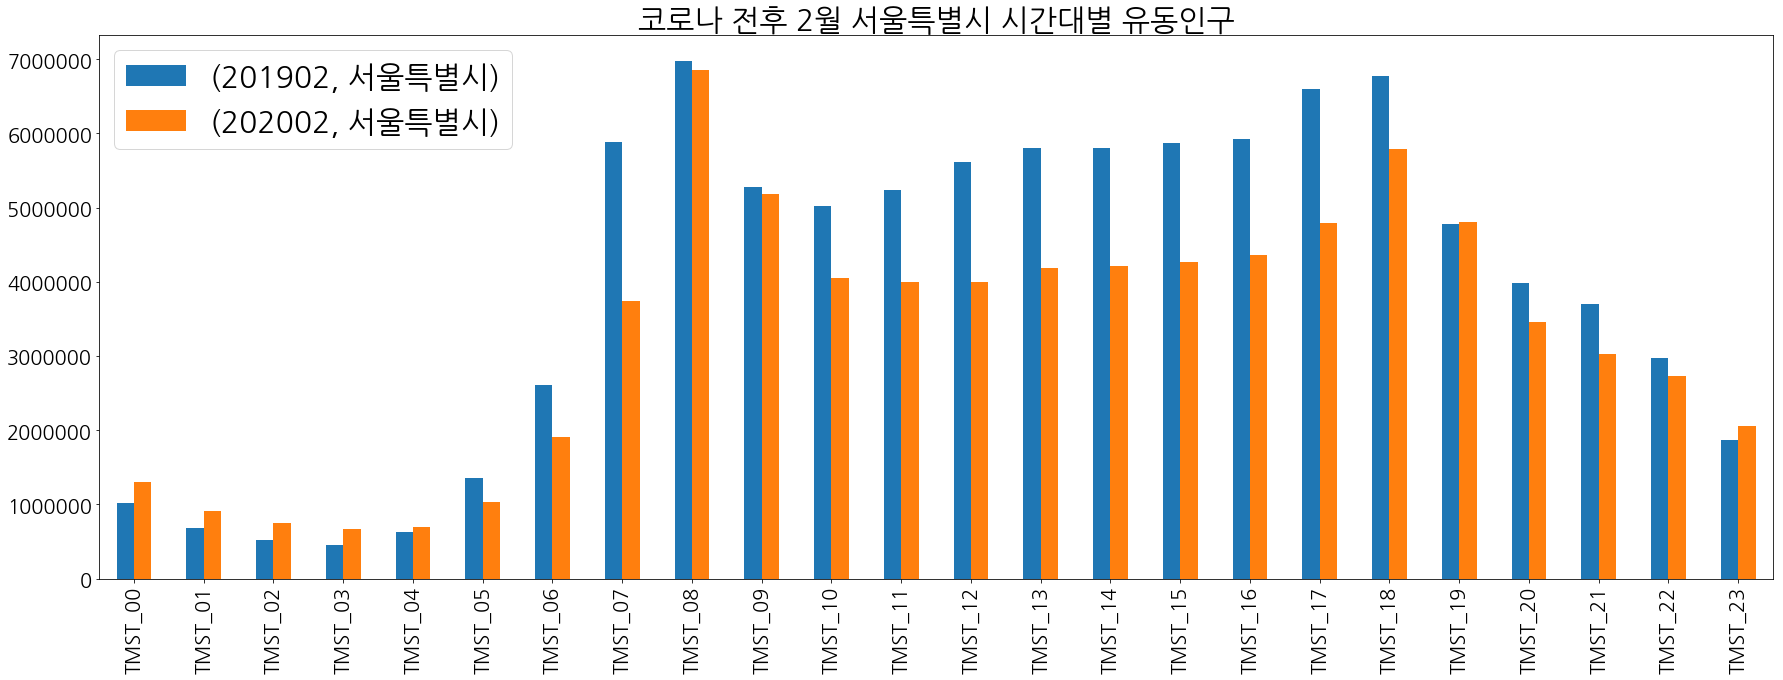

In [81]:
sk_month_move.T.iloc[:, [1, 9]].plot(kind = 'bar')
plt.title('코로나 전후 2월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [312]:
start = 1
end = 9
YM = '2월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 서울의 유동인구 변화량은 TMST_19에 제일 작으며, TMST_07에 제일 크다
2월 서울은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_00에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '19', '23']시간에 이동량 증가


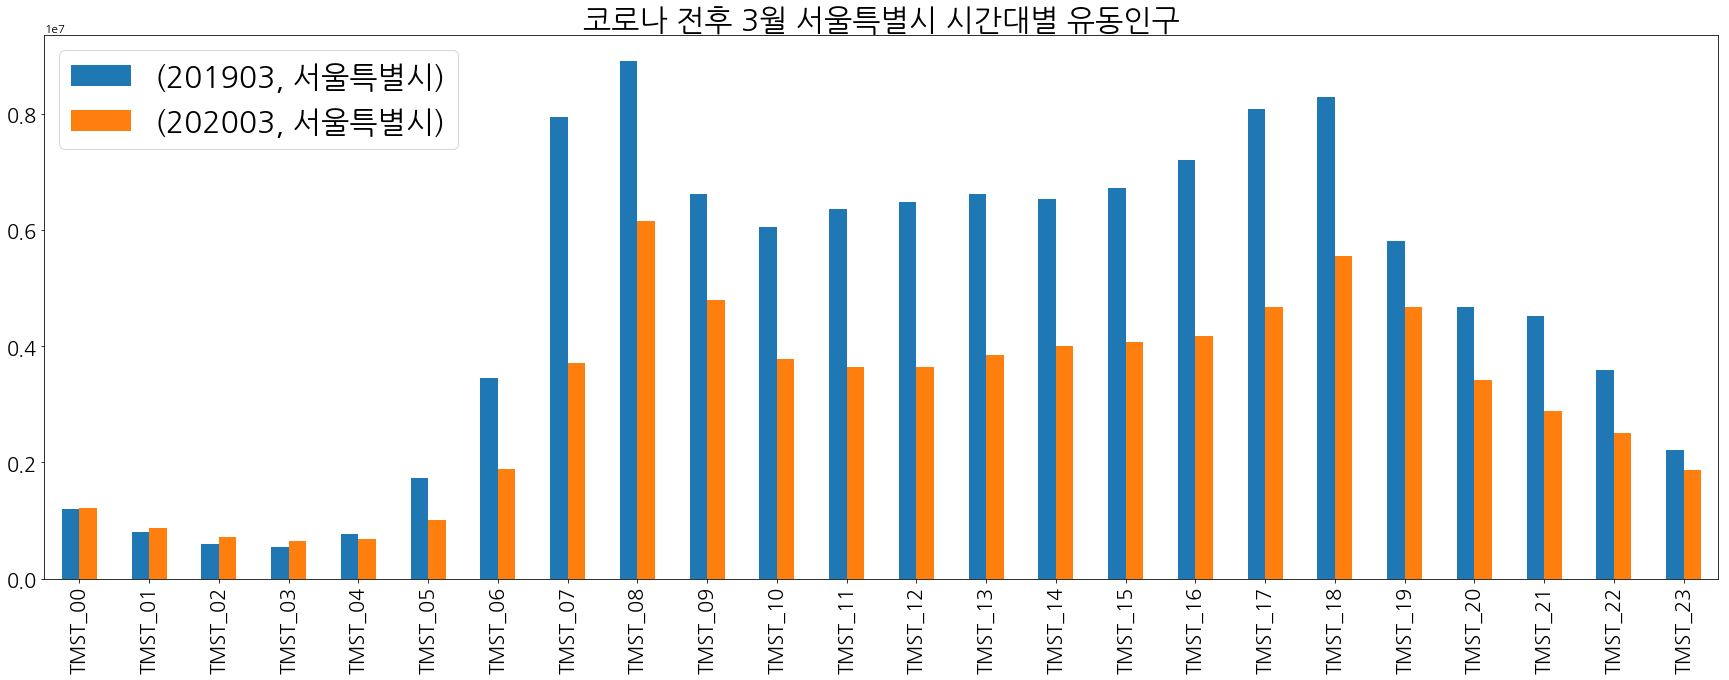

In [82]:
sk_month_move.T.iloc[:, [3, 11]].plot(kind = 'bar')
plt.title('코로나 전후 3월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [313]:
start = 3
end = 11

YM = '3월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 서울의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_07에 제일 크다
3월 서울은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_02에 가장 큰 폭으로 증가하였다.
['04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['00', '01', '02', '03']시간에 이동량 증가


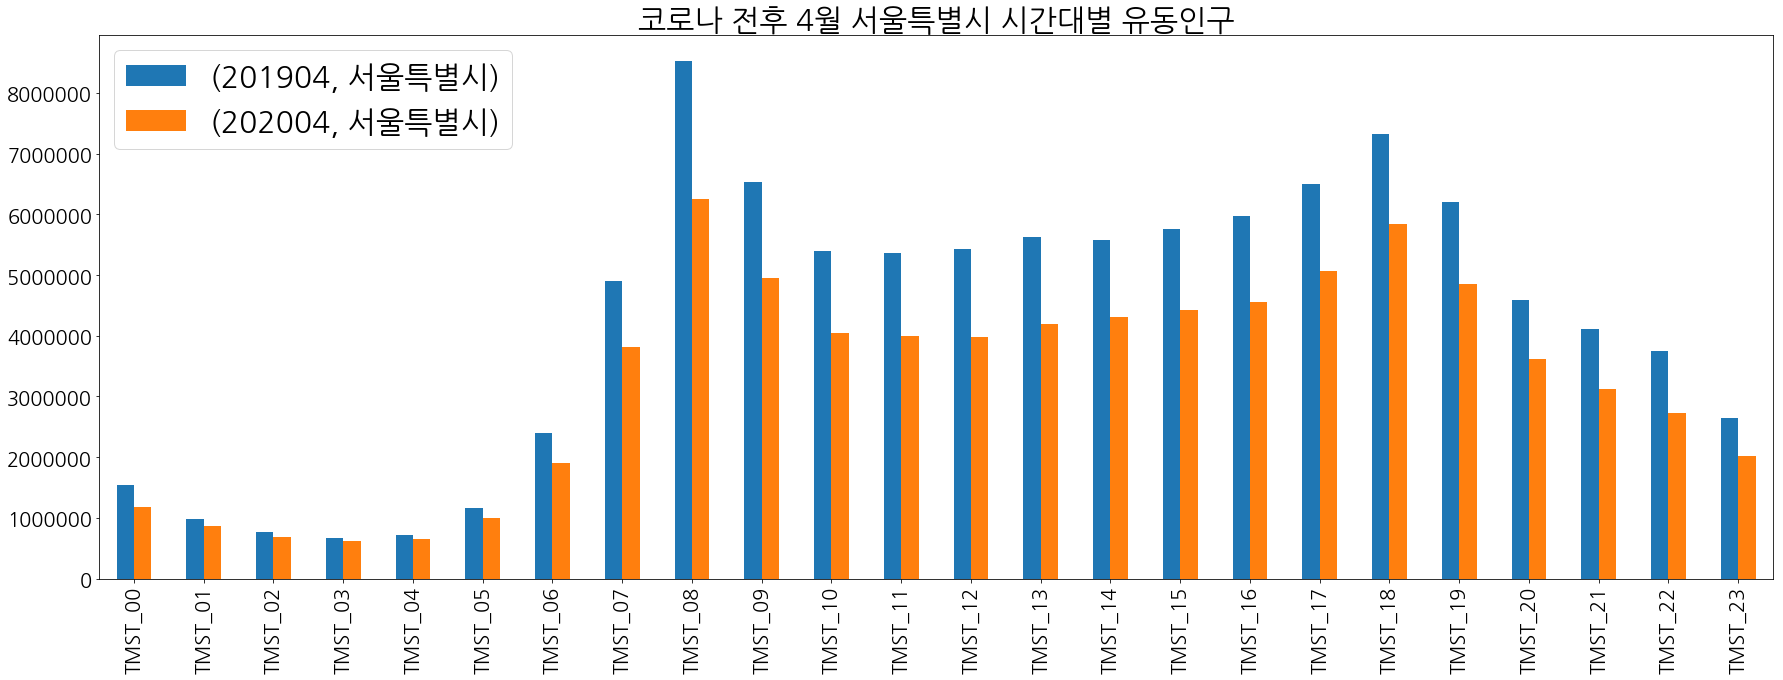

In [83]:
sk_month_move.T.iloc[:, [5, 13]].plot(kind = 'bar')
plt.title('코로나 전후 4월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [314]:
start = 5
end = 13

YM = '4월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 서울의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
4월 서울은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


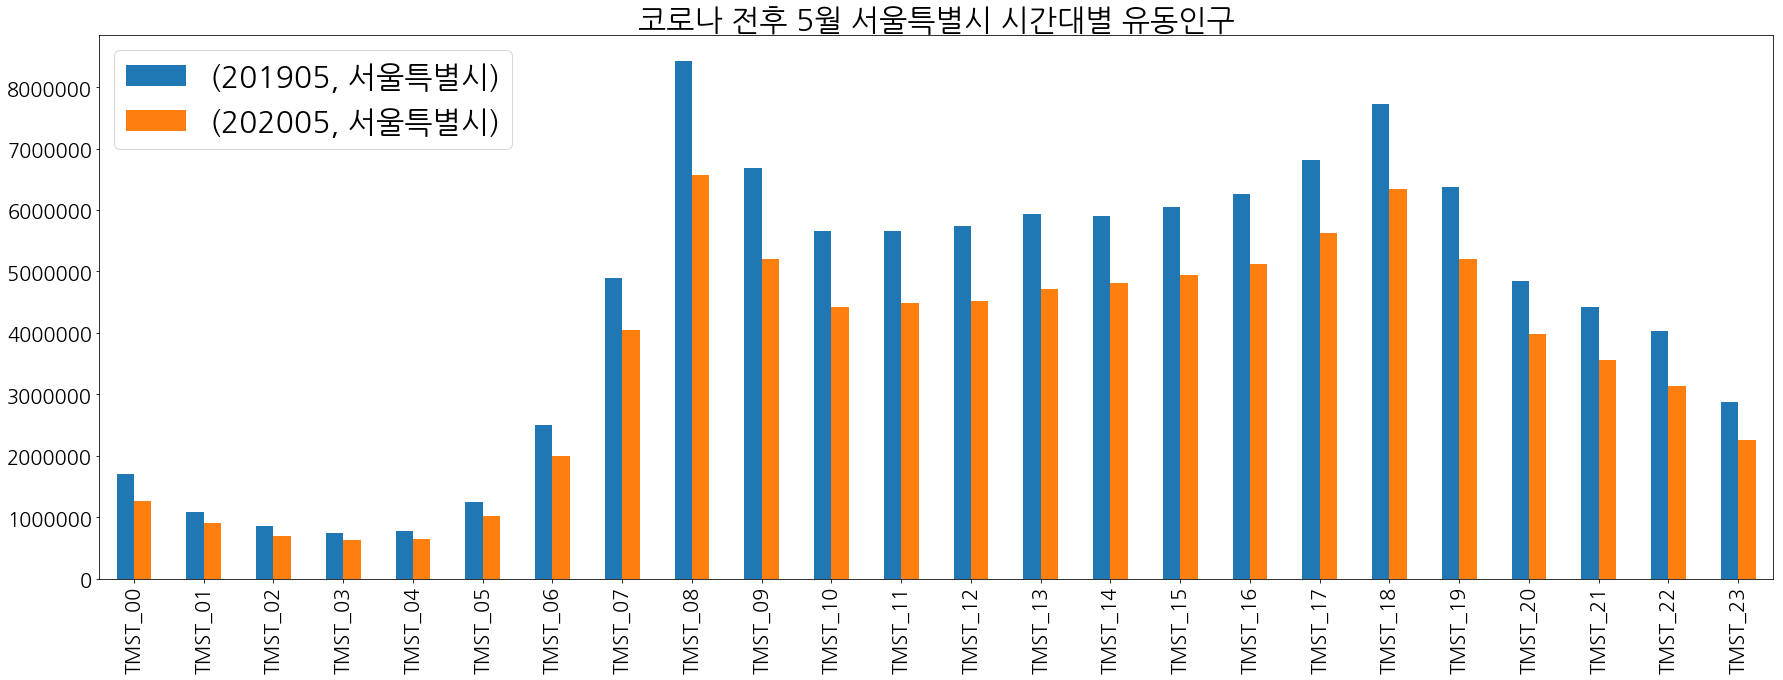

In [84]:
sk_month_move.T.iloc[:, [7, 15]].plot(kind = 'bar')
plt.title('코로나 전후 5월 서울특별시 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [315]:
start = 7
end = 15

YM = '5월 서울'

move_dif = sk_month_move.T.iloc[:, start] - sk_month_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 서울의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
5월 서울은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


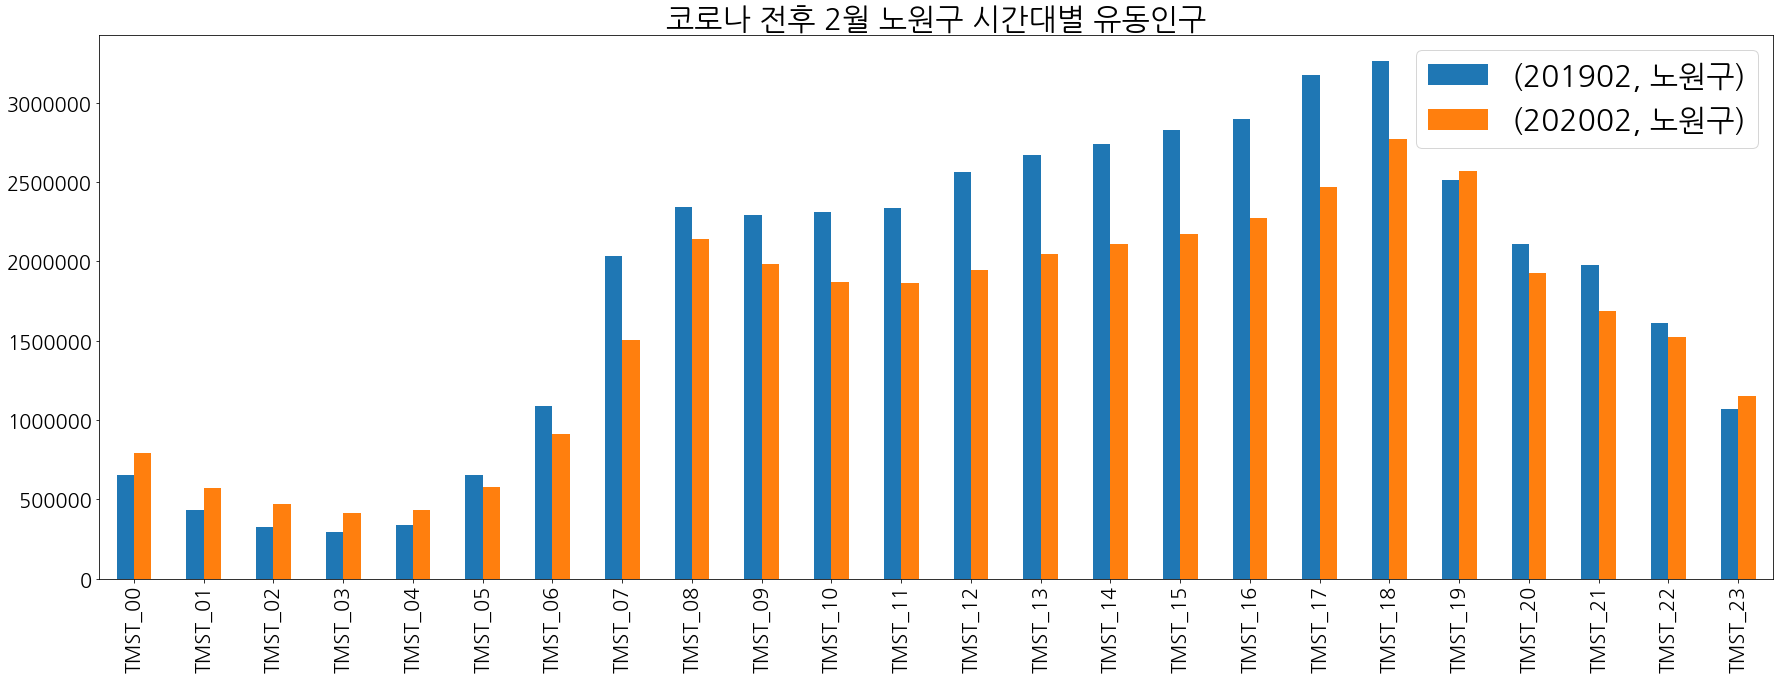

In [85]:
sk_month_GU_move.T.iloc[:, [0, 12]].plot(kind = 'bar')
plt.title('코로나 전후 2월 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [316]:
start = 2
end = 12

YM = '2월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 노원구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_08에 제일 크다
2월 노원구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_00에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '23']시간에 이동량 증가


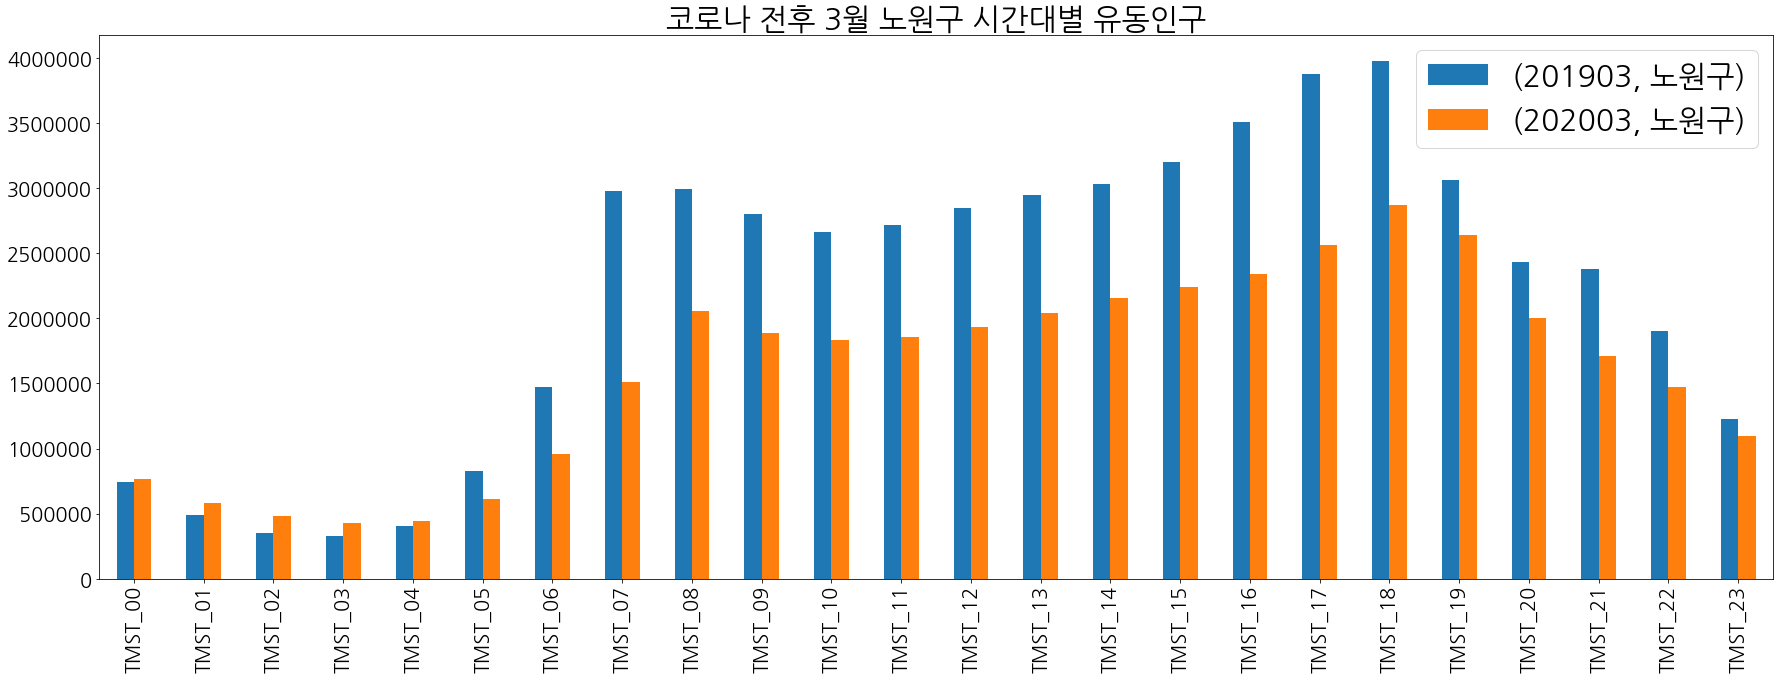

In [86]:
sk_month_GU_move.T.iloc[:, [3, 15]].plot(kind = 'bar')
plt.title('코로나 전후 3월 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [317]:
start = 3
end = 15

YM = '3월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 노원구의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_07에 제일 크다
3월 노원구은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_02에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['00', '01', '02', '03', '04']시간에 이동량 증가


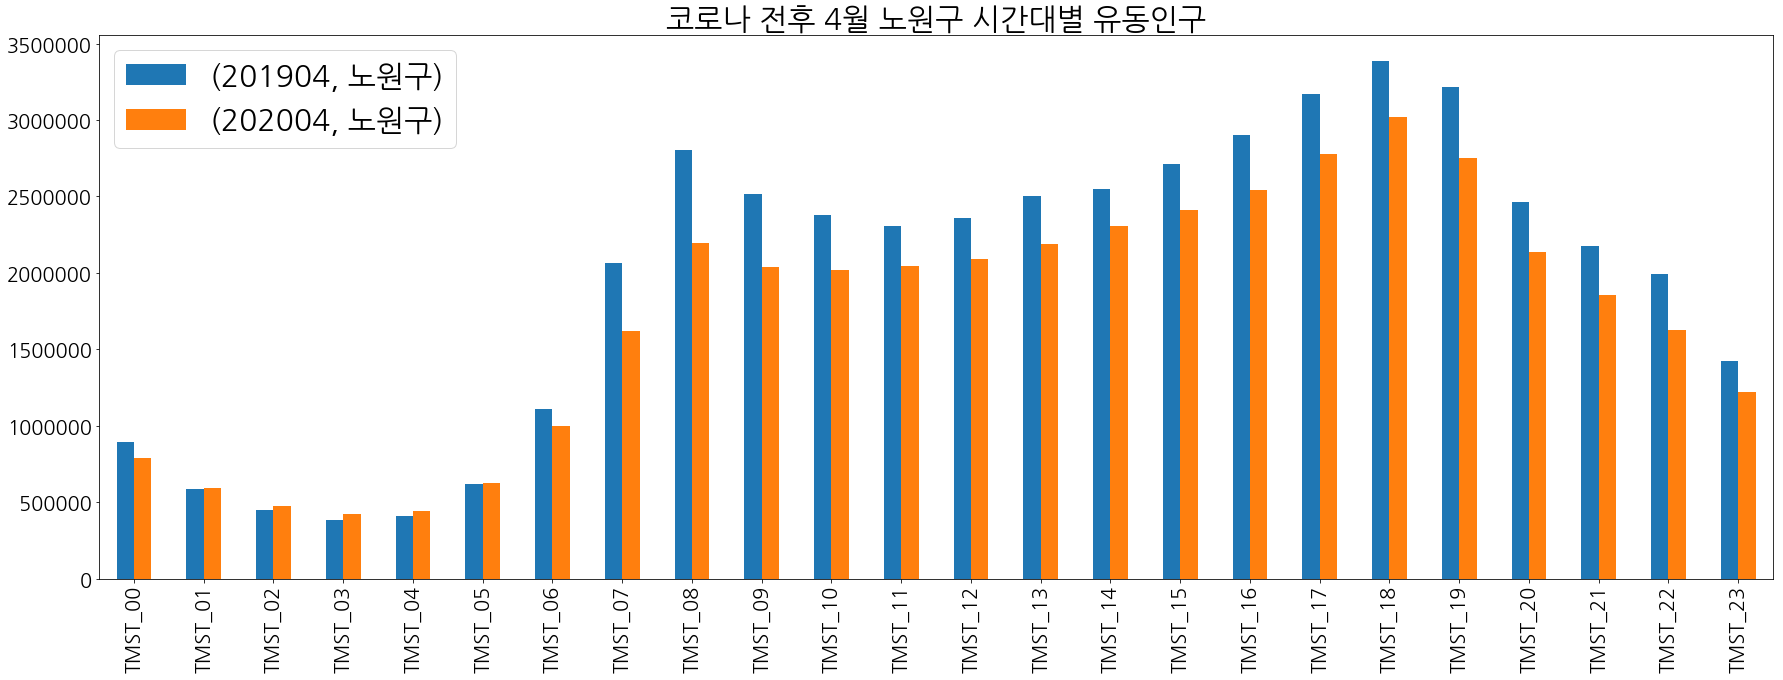

In [87]:
sk_month_GU_move.T.iloc[:, [6, 18]].plot(kind = 'bar')
plt.title('코로나 전후 4월 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [318]:
start = 6
end = 18

YM = '4월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 노원구의 유동인구 변화량은 TMST_01에 제일 작으며, TMST_08에 제일 크다
4월 노원구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['01', '02', '03', '04', '05']시간에 이동량 증가


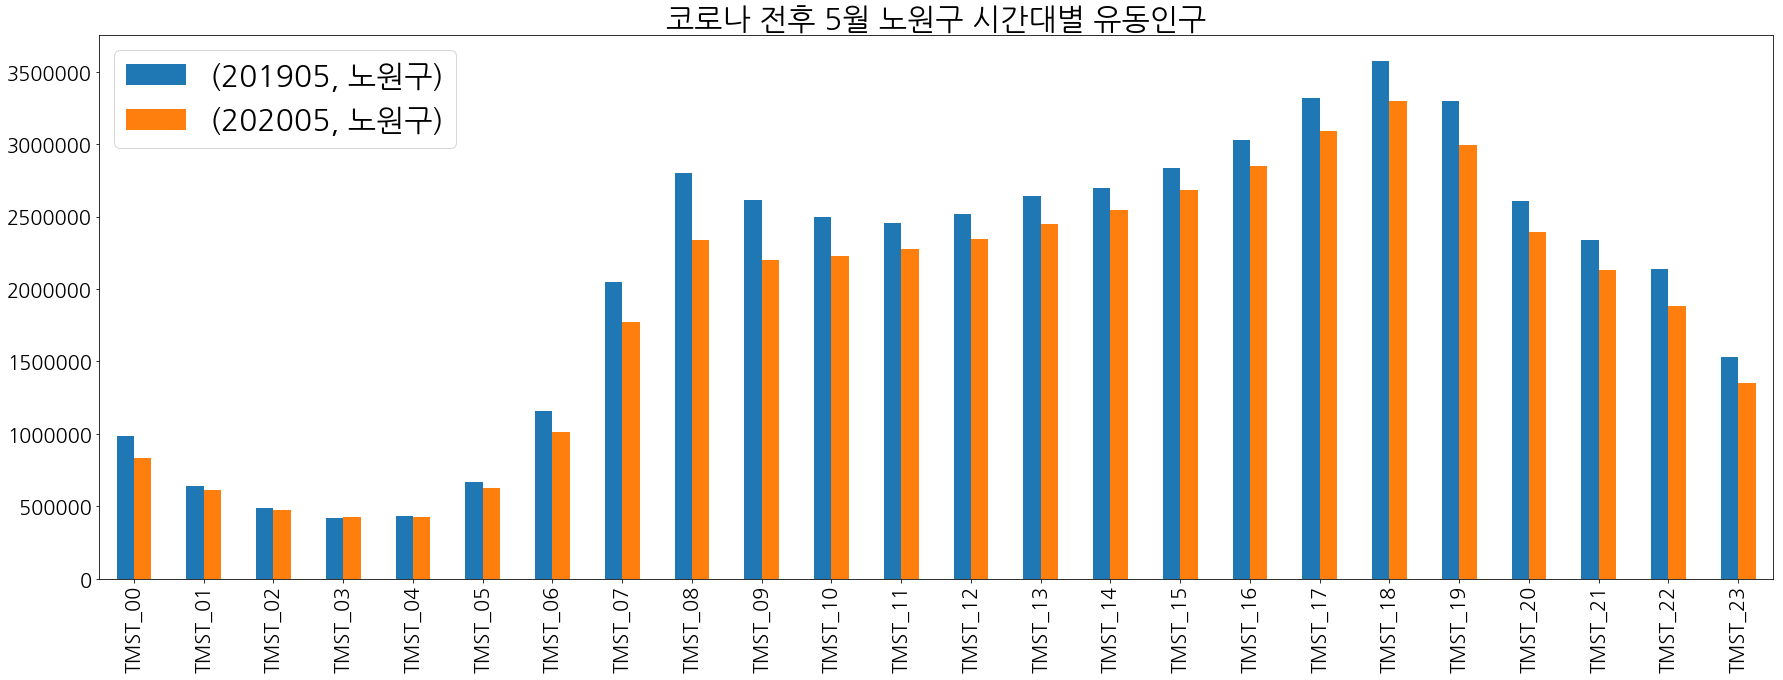

In [88]:
sk_month_GU_move.T.iloc[:, [9, 21]].plot(kind = 'bar')
plt.title('코로나 전후 5월 노원구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [319]:
start = 9
end = 21

YM = '5월 노원구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 노원구의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
5월 노원구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['03']시간에 이동량 증가


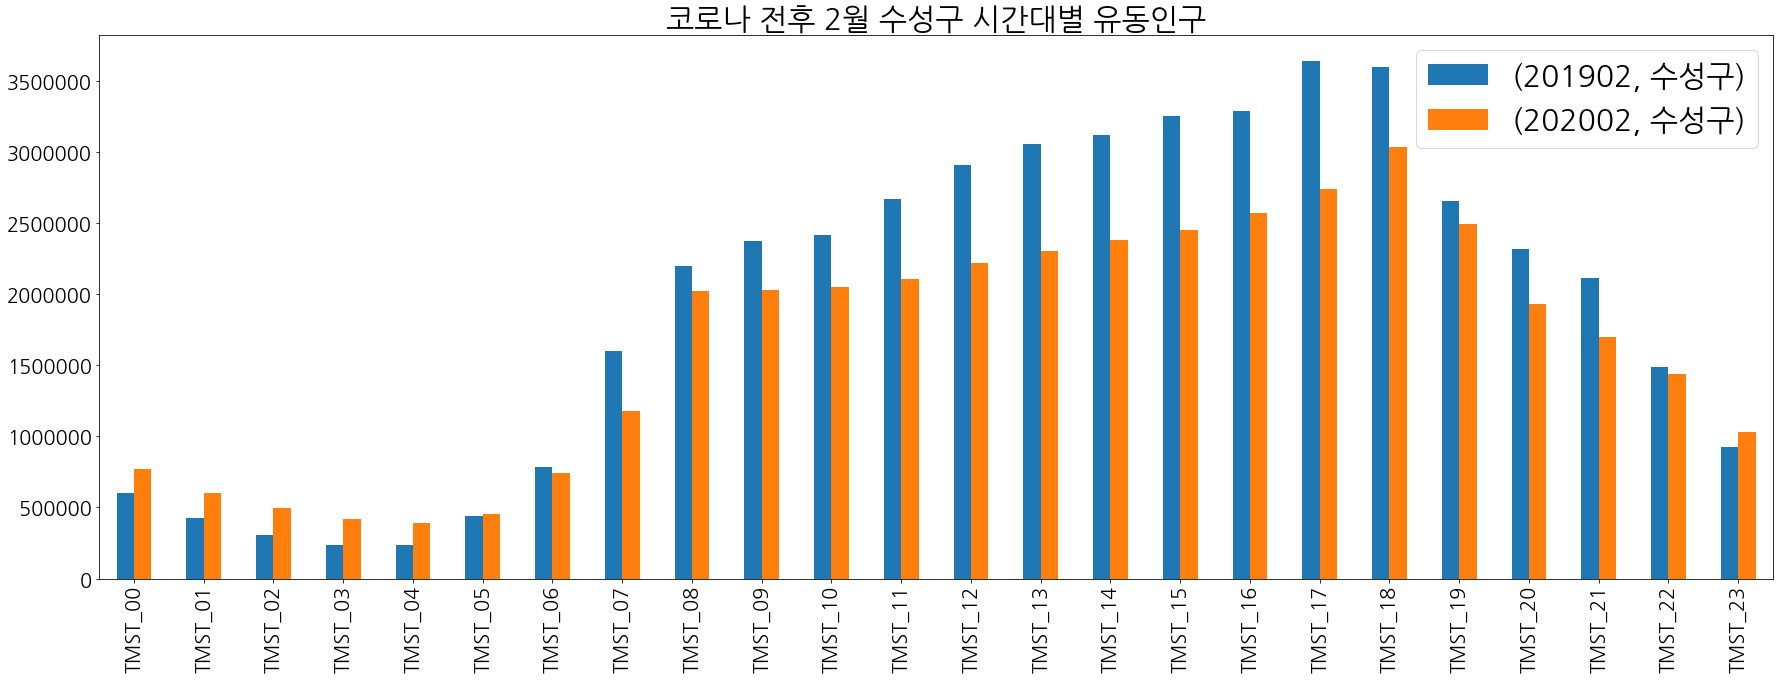

In [89]:
sk_month_GU_move.T.iloc[:, [1, 13]].plot(kind = 'bar')
plt.title('코로나 전후 2월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [320]:
start = 1
end = 13

YM = '2월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 수성구의 유동인구 변화량은 TMST_05에 제일 작으며, TMST_17에 제일 크다
2월 수성구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_02에 가장 큰 폭으로 증가하였다.
['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '05', '23']시간에 이동량 증가


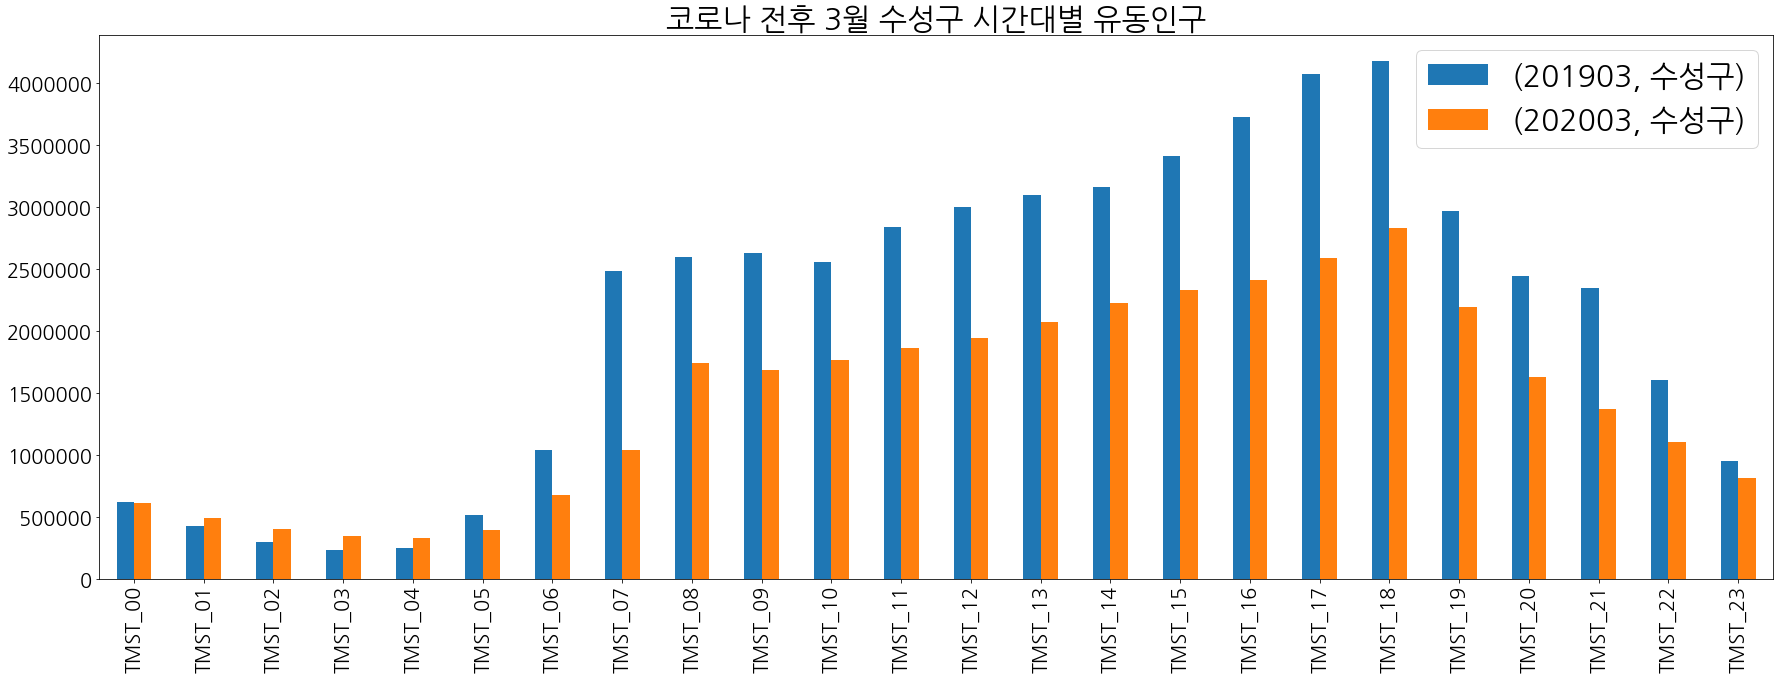

In [90]:
sk_month_GU_move.T.iloc[:, [4, 16]].plot(kind = 'bar')
plt.title('코로나 전후 3월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [321]:
start = 4
end = 16

YM = '3월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 수성구의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_17에 제일 크다
3월 수성구은 TMST_17에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['01', '02', '03', '04']시간에 이동량 증가


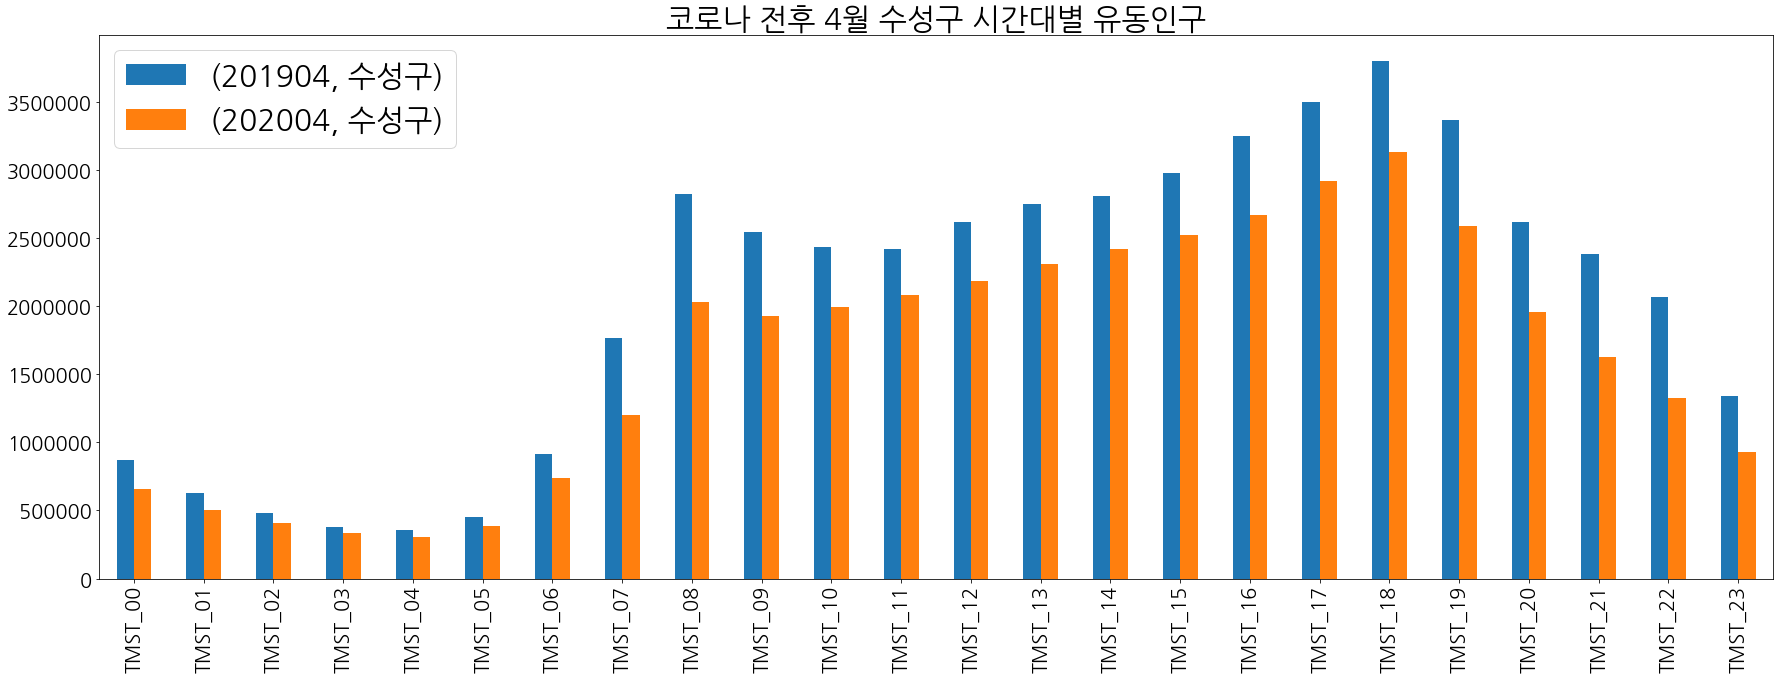

In [91]:
sk_month_GU_move.T.iloc[:, [7, 19]].plot(kind = 'bar')
plt.title('코로나 전후 4월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [322]:
start = 7
end = 19

YM = '4월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 수성구의 유동인구 변화량은 TMST_03에 제일 작으며, TMST_08에 제일 크다
4월 수성구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


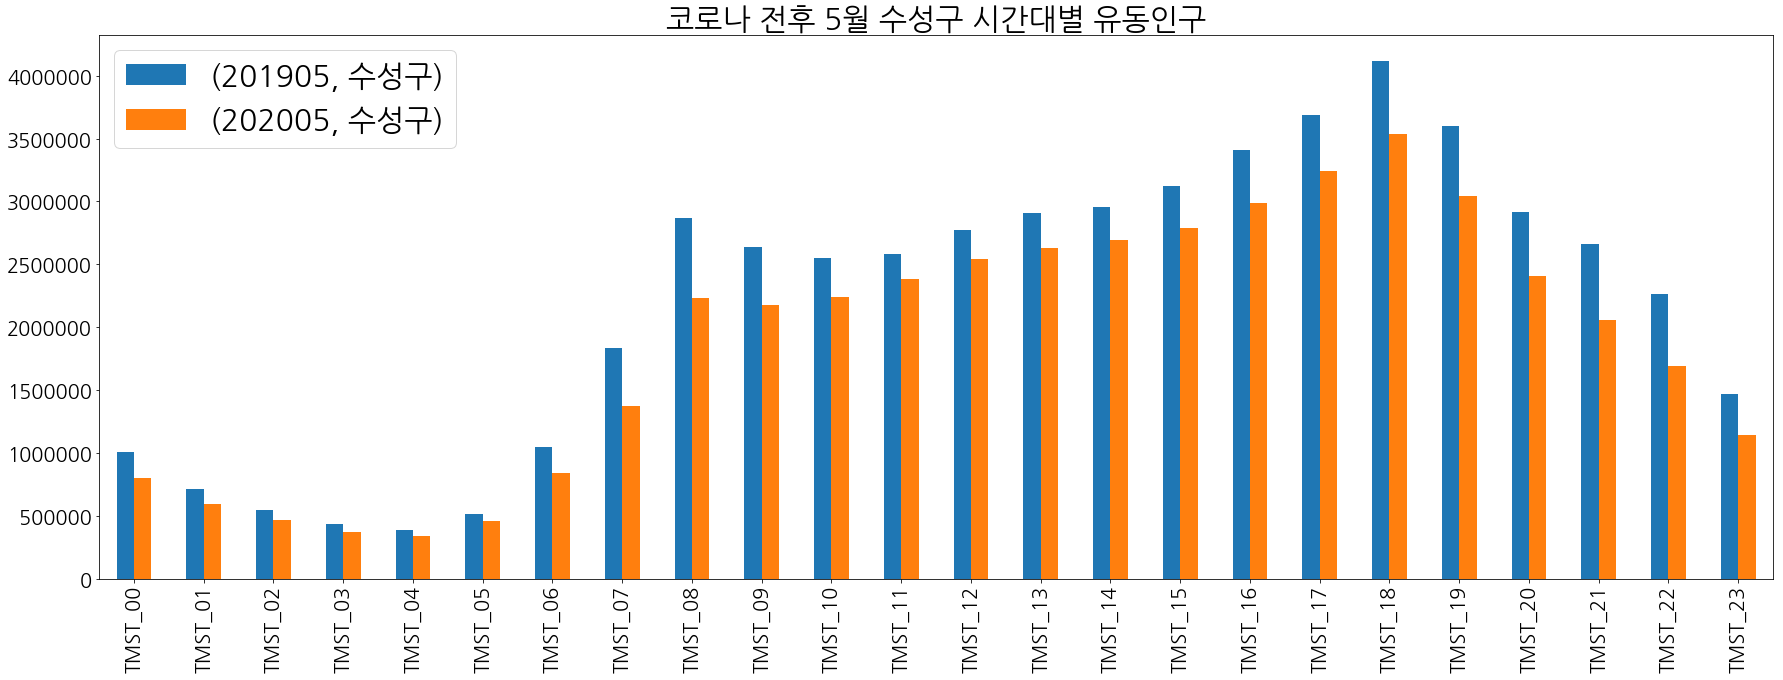

In [92]:
sk_month_GU_move.T.iloc[:, [10, 22]].plot(kind = 'bar')
plt.title('코로나 전후 5월 수성구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [323]:
start = 10
end = 22

YM = '5월 수성구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 수성구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_08에 제일 크다
5월 수성구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


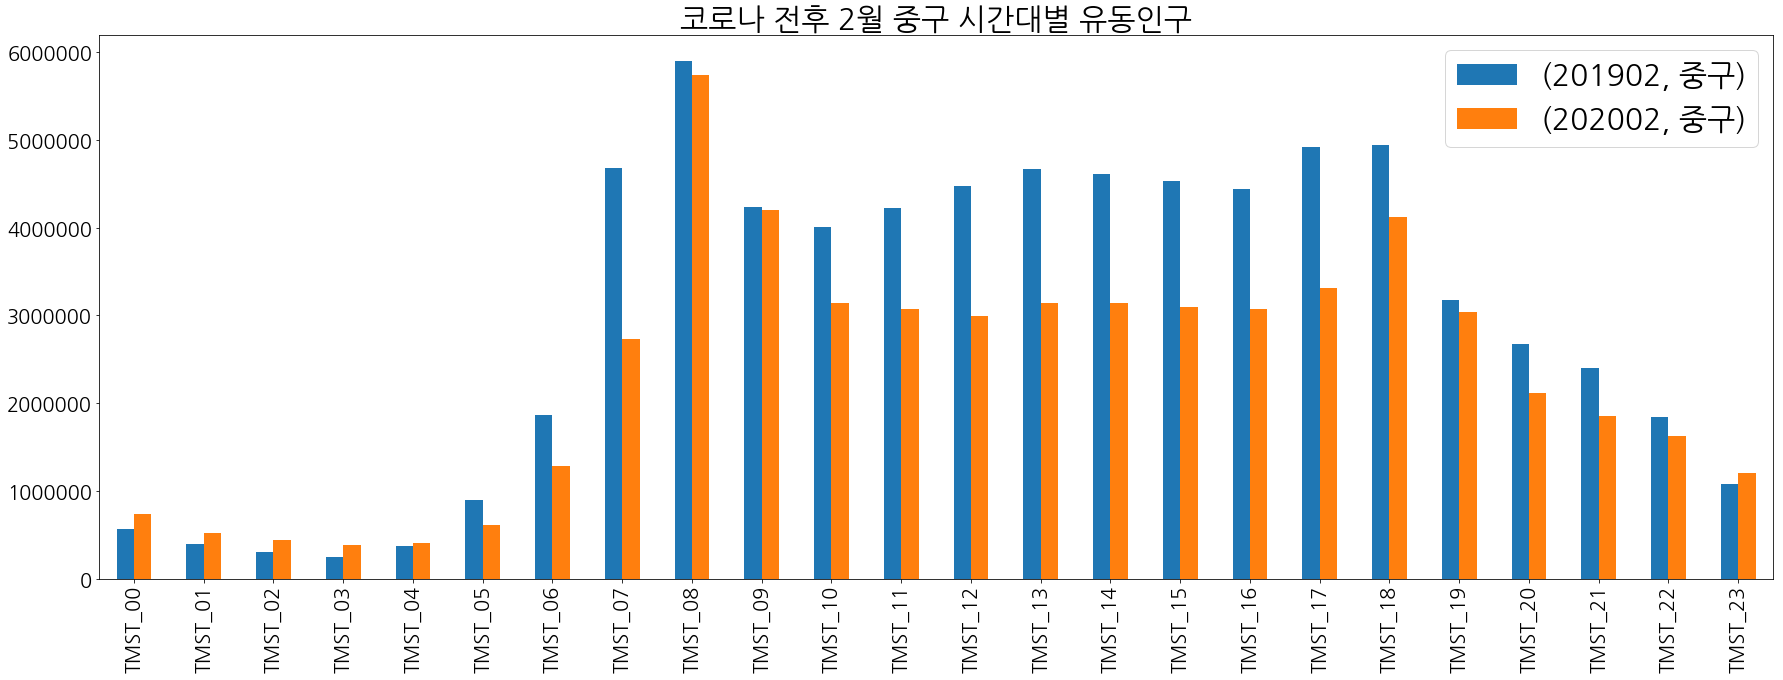

In [93]:
sk_month_GU_move.T.iloc[:, [2, 14]].plot(kind = 'bar')
plt.title('코로나 전후 2월 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [324]:
start = 2
end = 14

YM = '2월 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

2월 중구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_07에 제일 크다
2월 중구은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_00에 가장 큰 폭으로 증가하였다.
['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']시간에 이동량 감소
['00', '01', '02', '03', '04', '23']시간에 이동량 증가


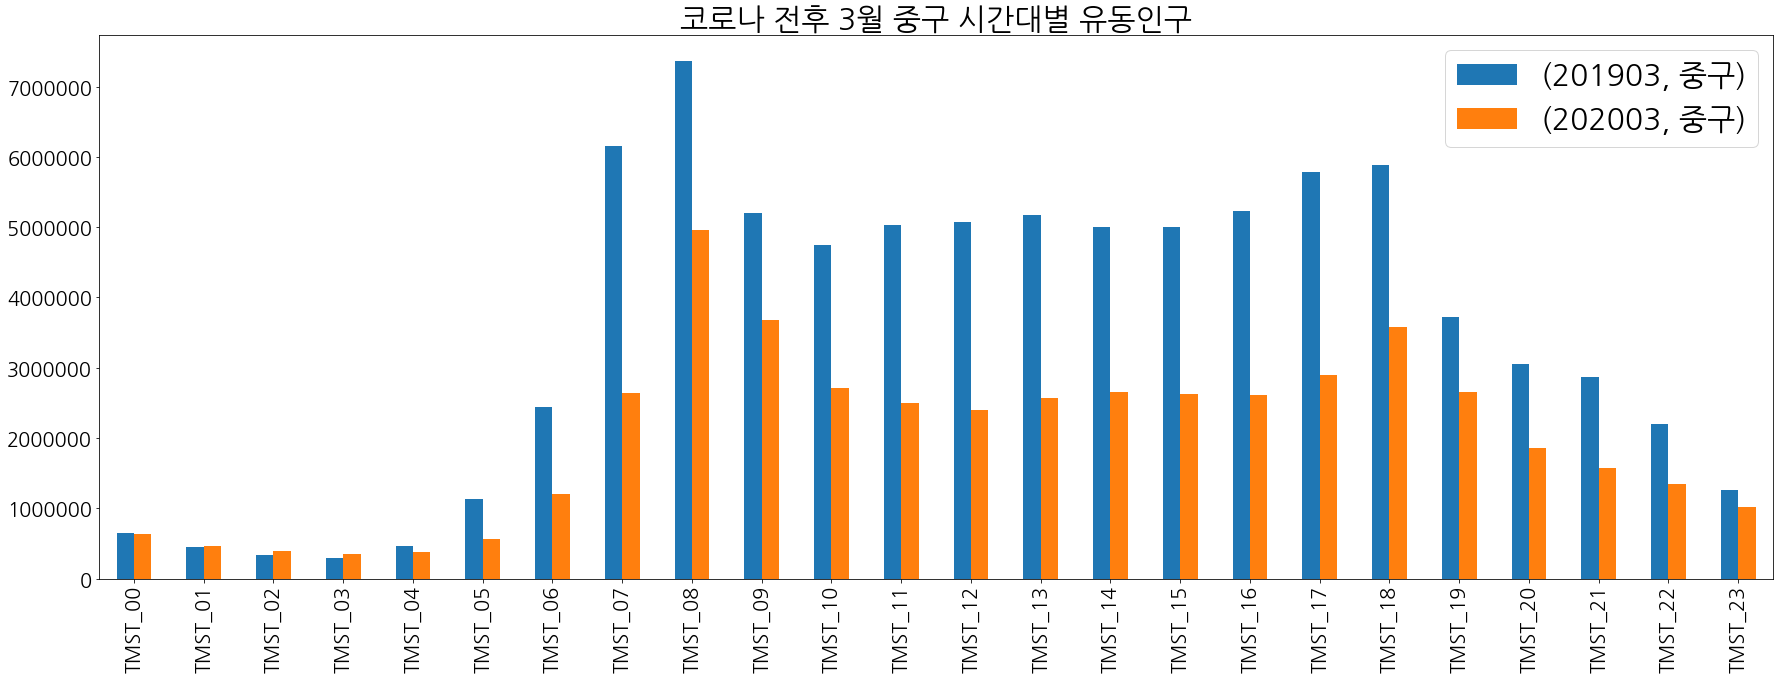

In [94]:
sk_month_GU_move.T.iloc[:, [5, 17]].plot(kind = 'bar')
plt.title('코로나 전후 3월 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [325]:
start = 5
end = 17

YM = '3월 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

3월 중구의 유동인구 변화량은 TMST_00에 제일 작으며, TMST_07에 제일 크다
3월 중구은 TMST_07에 이동량이 가장 큰 폭으로 감소하였으며, TMST_03에 가장 큰 폭으로 증가하였다.
['00', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
['01', '02', '03']시간에 이동량 증가


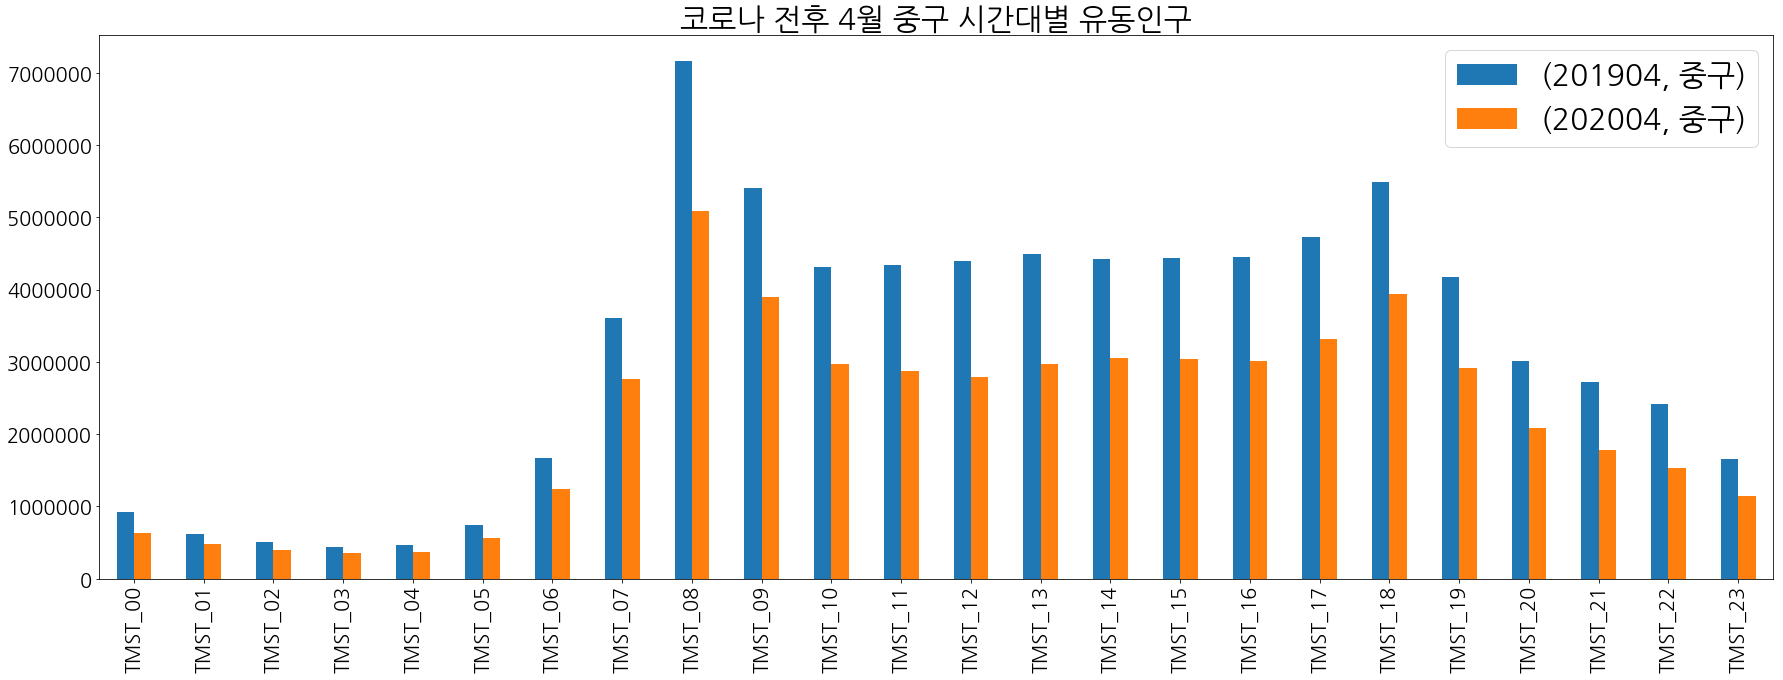

In [95]:
sk_month_GU_move.T.iloc[:, [8, 20]].plot(kind = 'bar')
plt.title('코로나 전후 4월 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [326]:
start = 8
end = 20

YM = '4월 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

4월 중구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_08에 제일 크다
4월 중구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


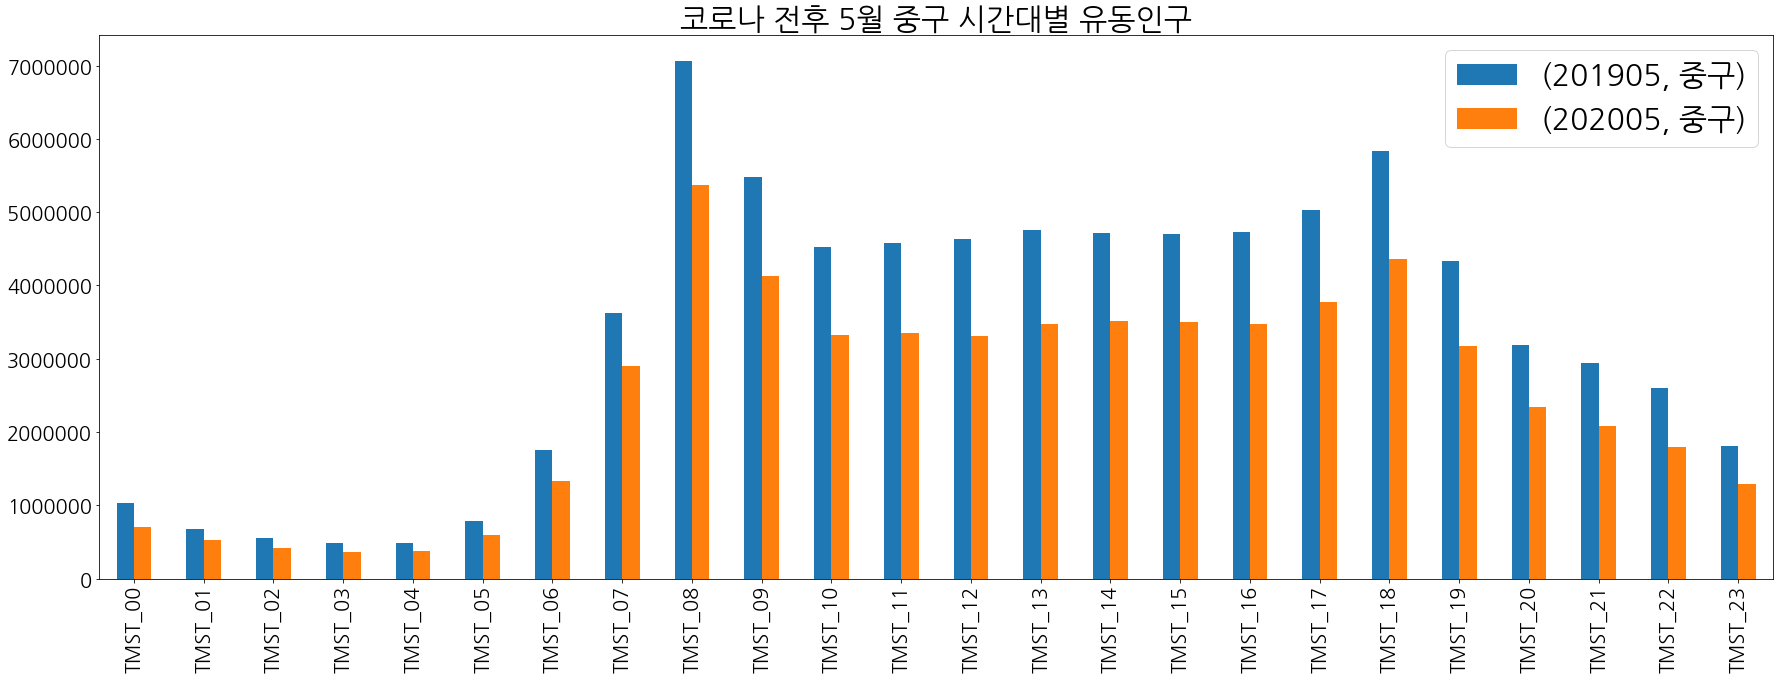

In [96]:
sk_month_GU_move.T.iloc[:, [11, 23]].plot(kind = 'bar')
plt.title('코로나 전후 5월 중구 시간대별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [327]:
start = 11
end = 23

YM = '5월 중구'

move_dif = sk_month_GU_move.T.iloc[:, start] - sk_month_GU_move.T.iloc[:, end]

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}에 제일 작으며, {move_dif.abs().idxmax()}에 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}에 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

down_move = list(map(lambda x : x[5:7], move_dif[move_dif>=0].index.tolist()))
up_move = list(map(lambda x : x[5:7], move_dif[move_dif<0].index.tolist()))

print(f'{down_move}시간에 이동량 감소')
print(f'{up_move}시간에 이동량 증가')

5월 중구의 유동인구 변화량은 TMST_04에 제일 작으며, TMST_08에 제일 크다
5월 중구은 TMST_08에 이동량이 가장 큰 폭으로 감소하였으며, TMST_04에 가장 큰 폭으로 증가하였다.
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']시간에 이동량 감소
[]시간에 이동량 증가


# 2. 연령별 유동인구 EDA

In [97]:
sk_month_move_AGE = sk_data_AGE.groupby([sk_data_TIME['STD_YM'], sk_data_TIME['CITY']]).sum().iloc[:, 3:]

In [334]:
for i in sk_month_move_AGE.T.max(axis = 1):
    index = list(np.where(sk_month_move_AGE.T == i))
    
    row_idx = sk_month_move_AGE.T.index[index[0]]
    col_idx = sk_month_move_AGE.T.columns[index[1]][0]
    
    print(f'{row_idx[0][:3]}&{row_idx[0][-4:]}의 유동인구가 가장 큰 시점은 {col_idx}입니다')
    
print('===============================================================================')

print(f'{sk_month_move_AGE.T.max(axis = 1).idxmax()} 연령의 유동인구가 가장 크며, 시점과 도시는 {sk_month_move_AGE.T.max(axis = 0).idxmax()}입니다.')

MAN&0004의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&0509의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
MAN&1014의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
MAN&1519의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
MAN&2024의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&2529의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&3034의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&3539의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&4044의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&4549의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&5054의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&5559의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&6064의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&6569의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
MAN&_70U의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
WMA&0004의 유동인구가 가장 큰 시점은 (201903, '서울특별시')입니다
WMA&0509의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
WMA&1014의 유동인구가 가장 큰 시점은 (201905, '대구광역시')입니다
WMA&1519의 유동인구가 가장 큰 시점은 (201905, '서울특별시')입니다
WMA&2024의 유동인구가 가장 큰 시점은 (201903, '대구광역시')입니다
WMA&2529의 유동인구가 가장 큰 시점은 (201903, '서울특별시')입니다
WMA&3034의 유동인구가 가장 큰 시점은 (201903, 

In [336]:
for i in sk_month_move_AGE.T.min(axis = 1):
    index = list(np.where(sk_month_move_AGE.T == i))
    
    row_idx = sk_month_move_AGE.T.index[index[0]]
    col_idx = sk_month_move_AGE.T.columns[index[1]][0]
    
    print(f'{row_idx[0][:3]}&{row_idx[0][-4:]}의 유동인구가 가장 작은 시점은 {col_idx}입니다')
    
print('===============================================================================')

print(f'{sk_month_move_AGE.T.min(axis = 1).idxmin()} 연령의 유동인구가 가장 작으며, 시점과 도시는 {sk_month_move_AGE.T.min(axis = 0).idxmin()}입니다.')

MAN&0004의 유동인구가 가장 작은 시점은 (202003, '대구광역시')입니다
MAN&0509의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&1014의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&1519의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&2024의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&2529의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&3034의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&3539의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&4044의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&4549의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&5054의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&5559의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&6064의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&6569의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
MAN&_70U의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&0004의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&0509의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&1014의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&1519의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&2024의 유동인구가 가장 작은 시점은 (202003, '서울특별시')입니다
WMA&2529의 유동인구가 가장 작은 시점은 (202003, '대구광역시')입니다
WMA&3034의 유동인

### 2-1. 코로나 전후 도시별 연령별 유동인구

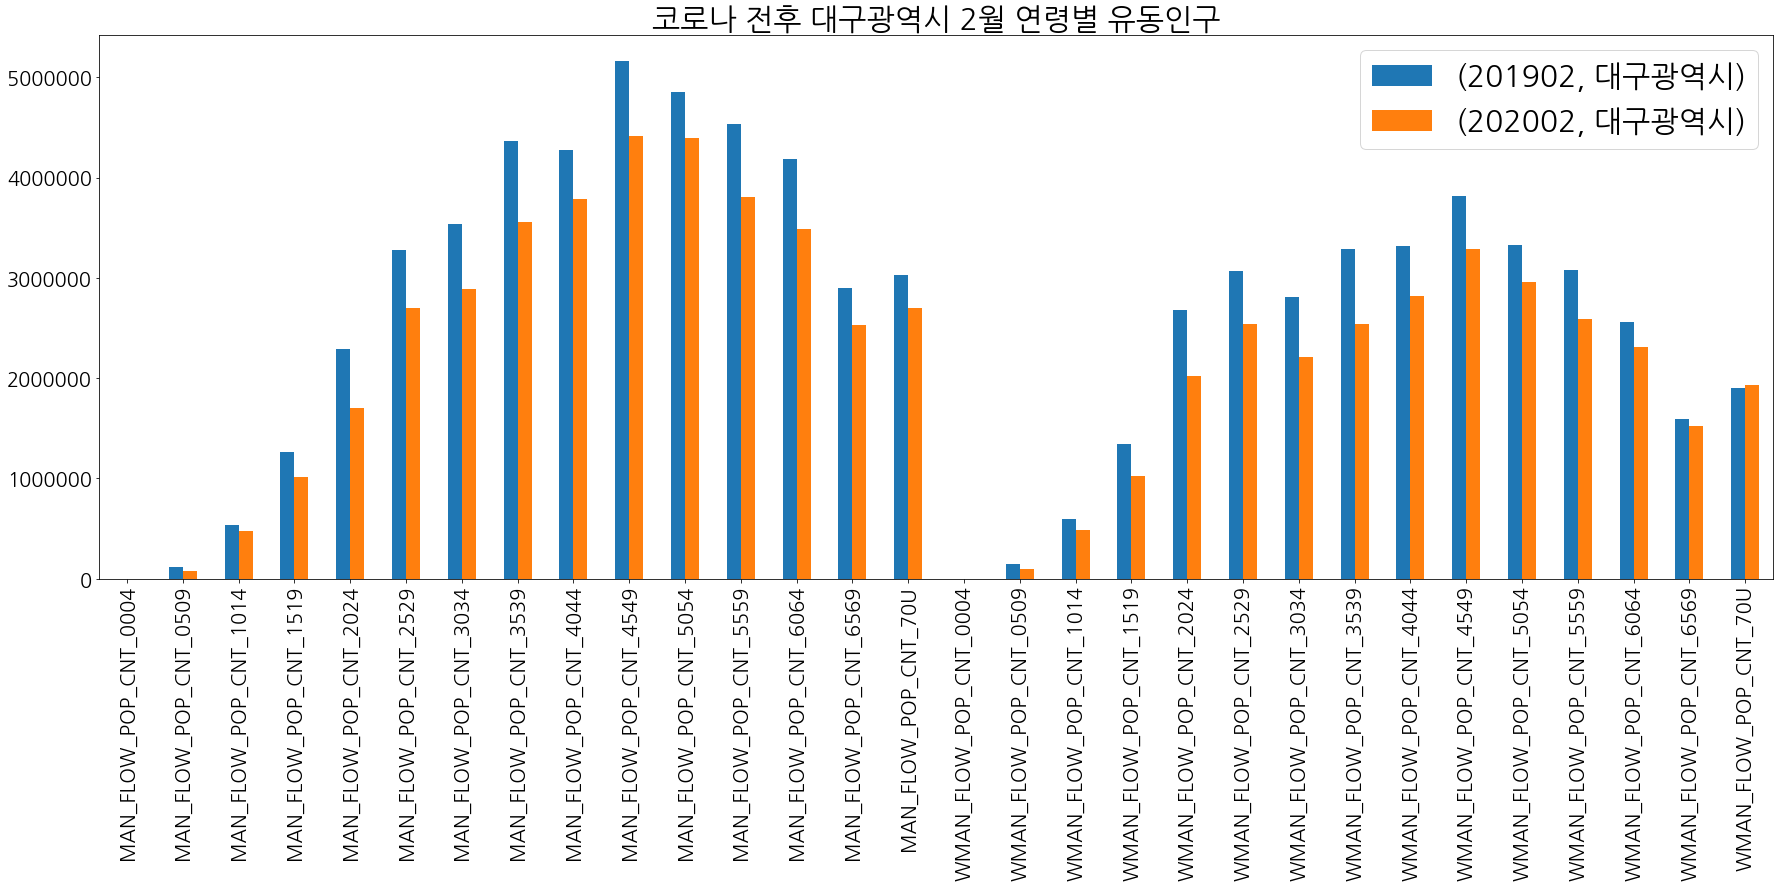

In [99]:
sk_month_move_AGE.T.iloc[:, [0, 8]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 2월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [372]:
start = 0
end = 8

YM = '2월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

2월 대구광역시의 유동인구 변화량은 WMAN_FLOW_POP_CNT_70U연령이 제일 작으며, MAN_FLOW_POP_CNT_3539연령이 제일 크다
2월 대구광역시은 MAN_FLOW_POP_CNT_3539의 이동량이 가장 큰 폭으로 감소하였으며, WMAN_FLOW_POP_CNT_70U에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569'] 연령은 이동량 감소
여자의 ['_70U'] 연령은 이동량 증가


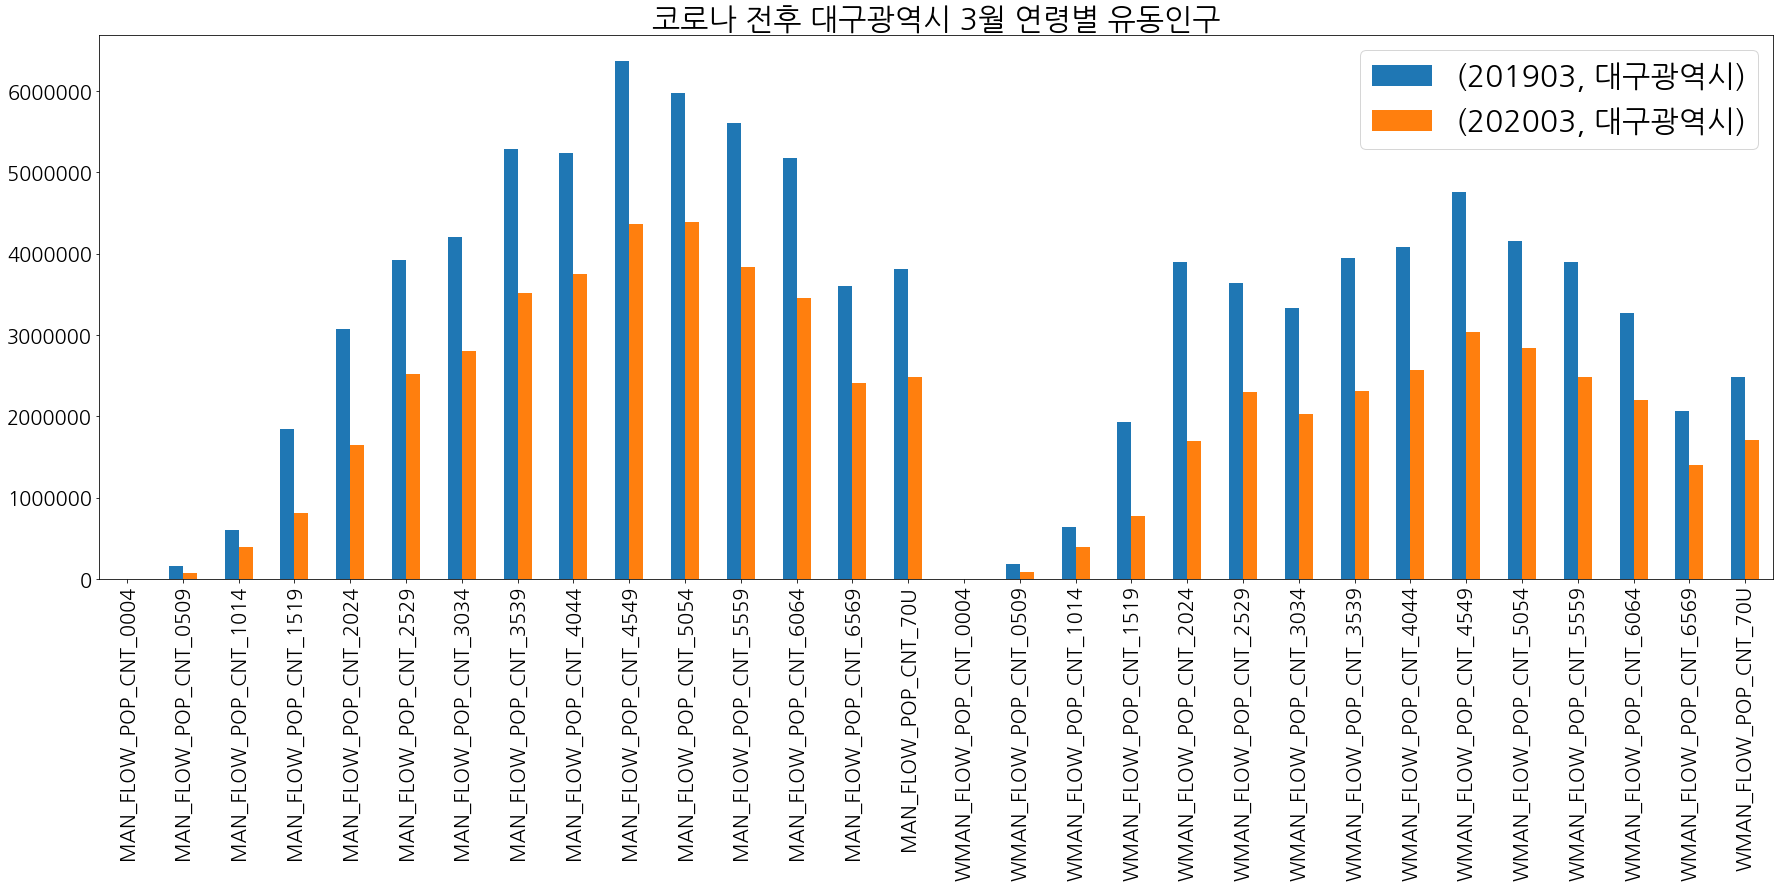

In [100]:
sk_month_move_AGE.T.iloc[:, [2, 10]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 3월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [373]:
start = 2
end = 10

YM = '3월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

3월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
3월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


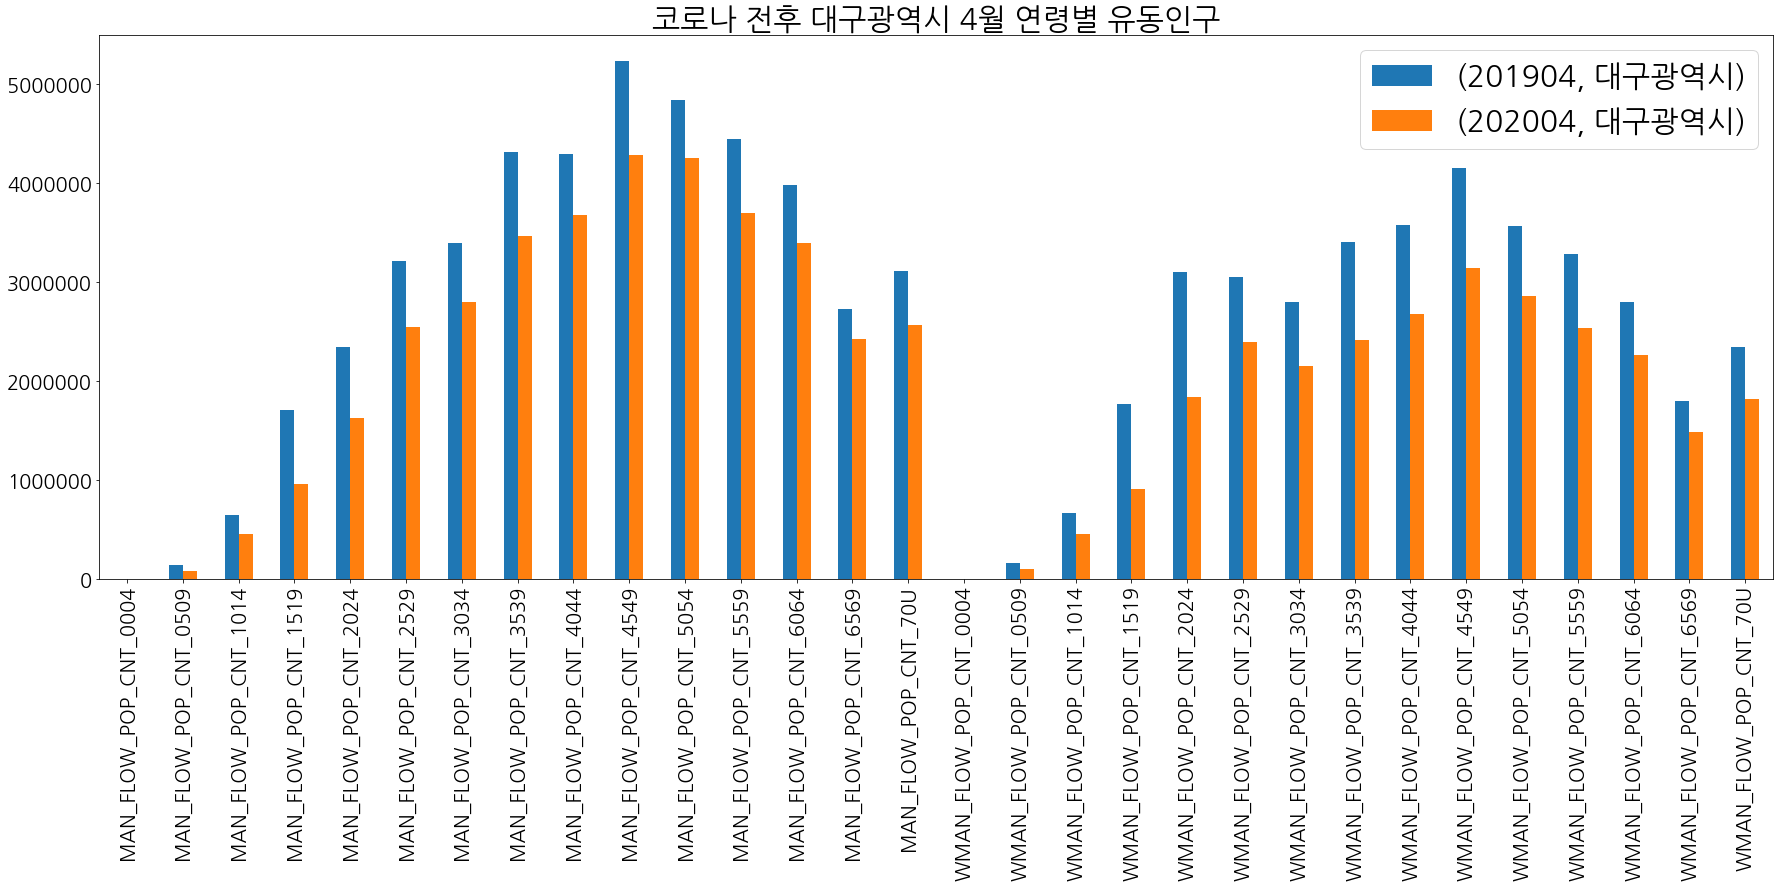

In [101]:
sk_month_move_AGE.T.iloc[:, [4, 12]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 4월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [374]:
start = 4
end = 12

YM = '4월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

4월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
4월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


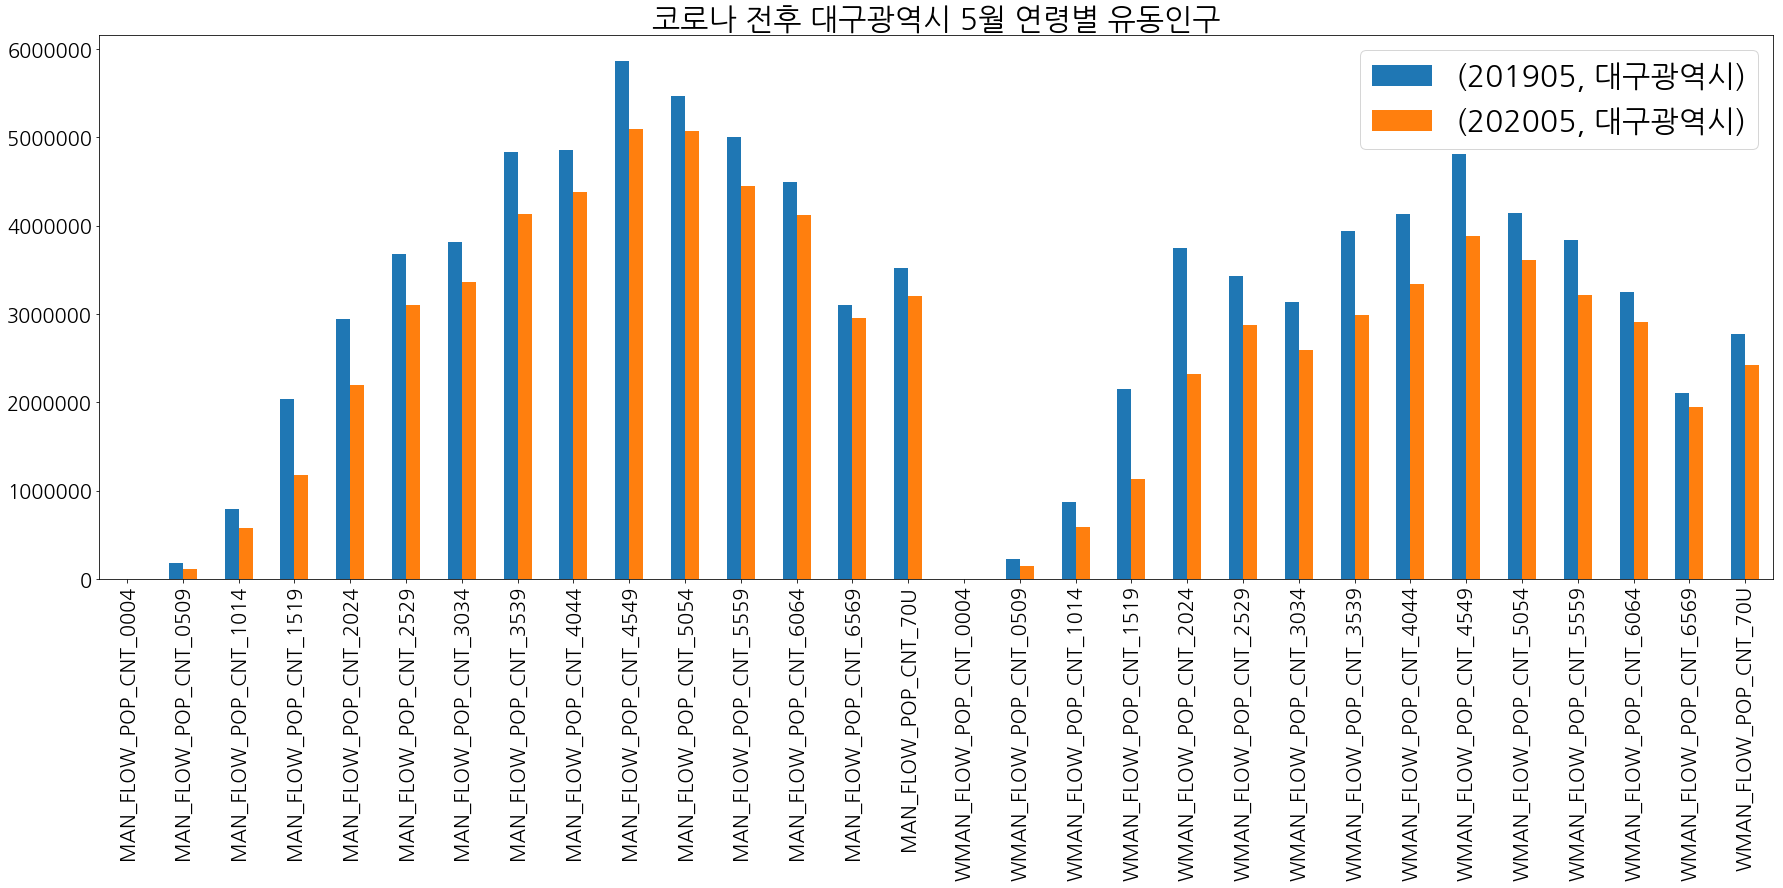

In [102]:
sk_month_move_AGE.T.iloc[:, [6, 14]].plot(kind = 'bar')
plt.title('코로나 전후 대구광역시 5월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [375]:
start = 6
end = 14

YM = '5월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

5월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
5월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


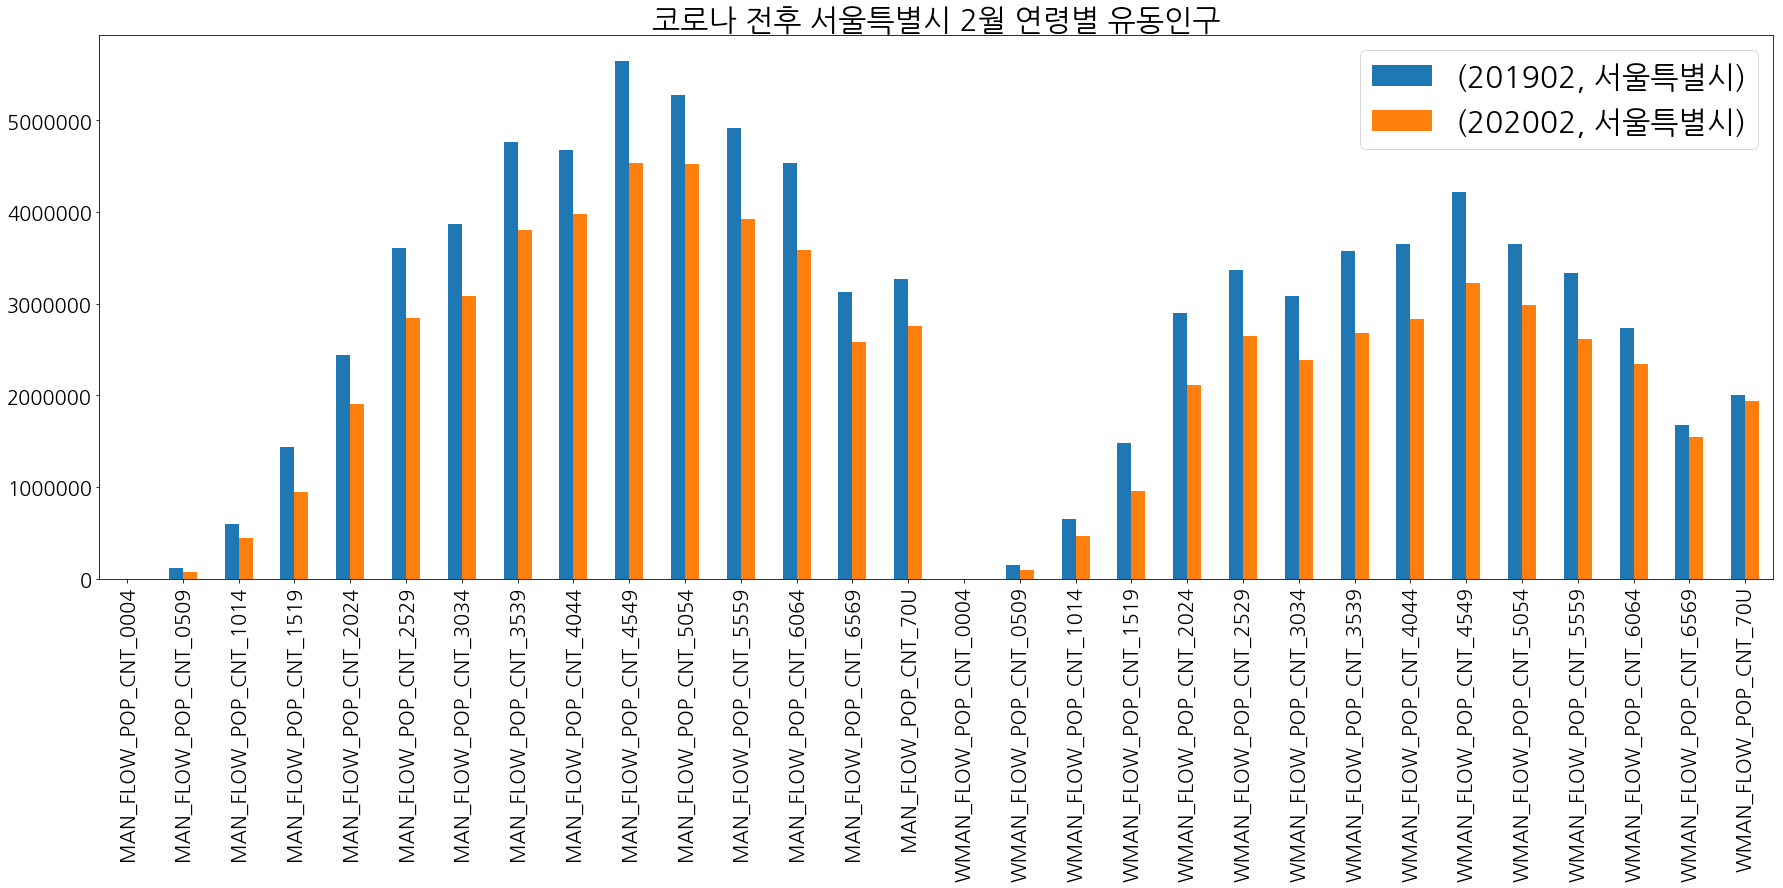

In [103]:
sk_month_move_AGE.T.iloc[:, [1, 9]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 2월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [376]:
start = 1
end = 9

YM = '2월 서울특별시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

2월 서울특별시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, MAN_FLOW_POP_CNT_4549연령이 제일 크다
2월 서울특별시은 MAN_FLOW_POP_CNT_4549의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


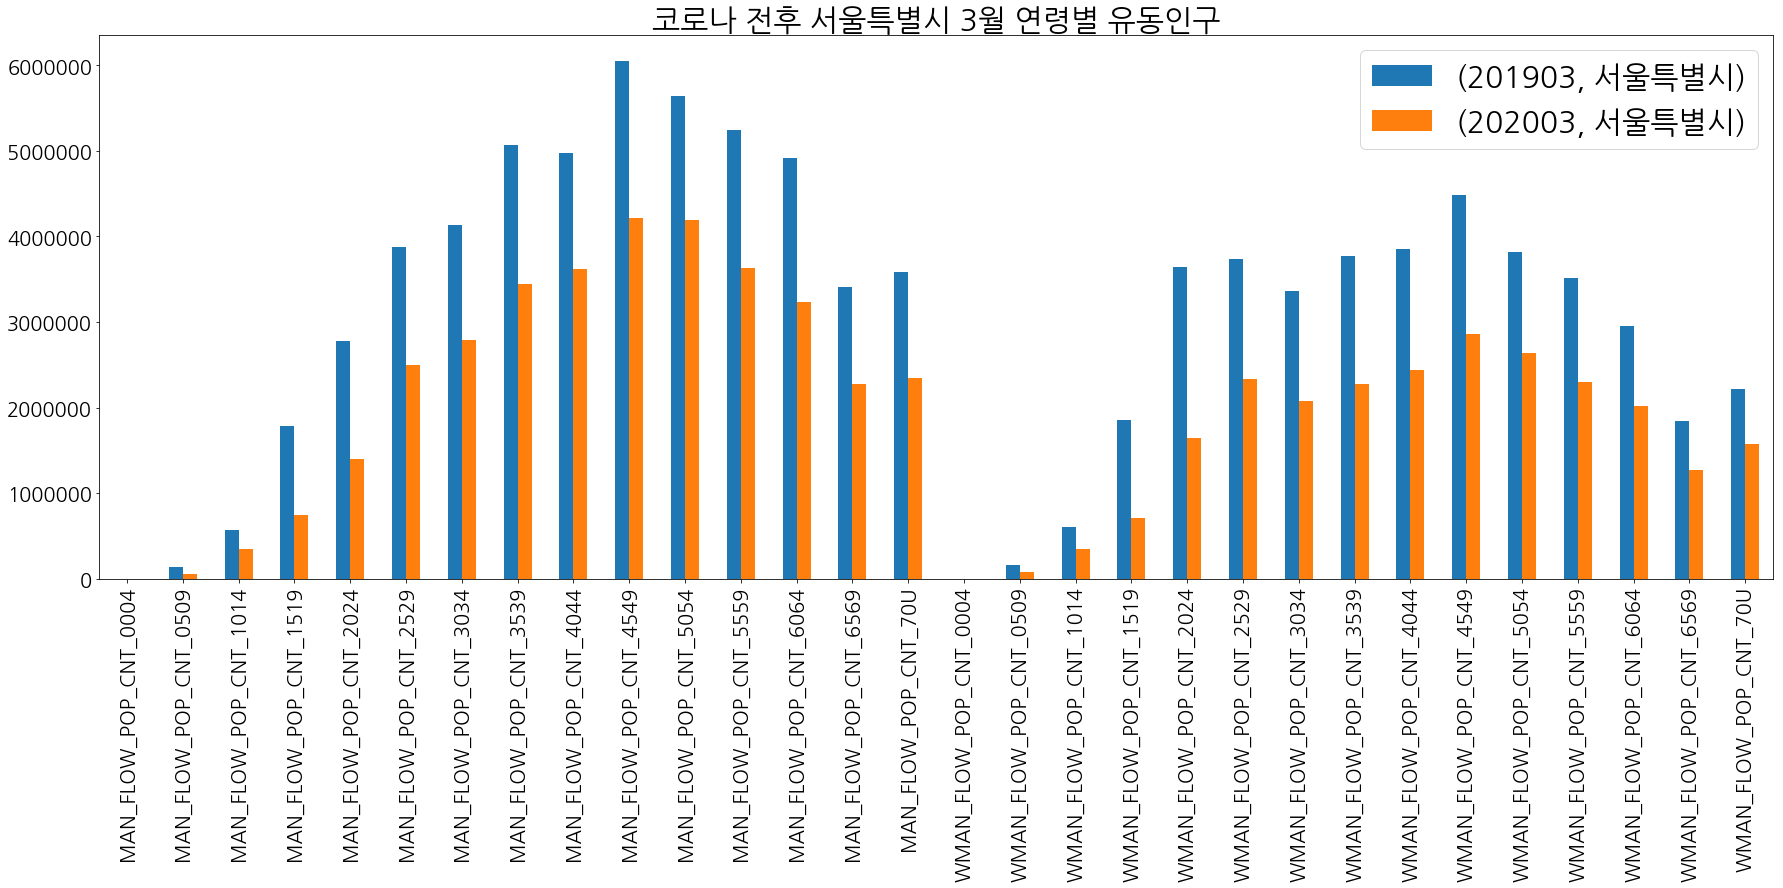

In [104]:
sk_month_move_AGE.T.iloc[:, [3, 11]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 3월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [377]:
start = 3
end = 11

YM = '3월 대구광역시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

3월 대구광역시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
3월 대구광역시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


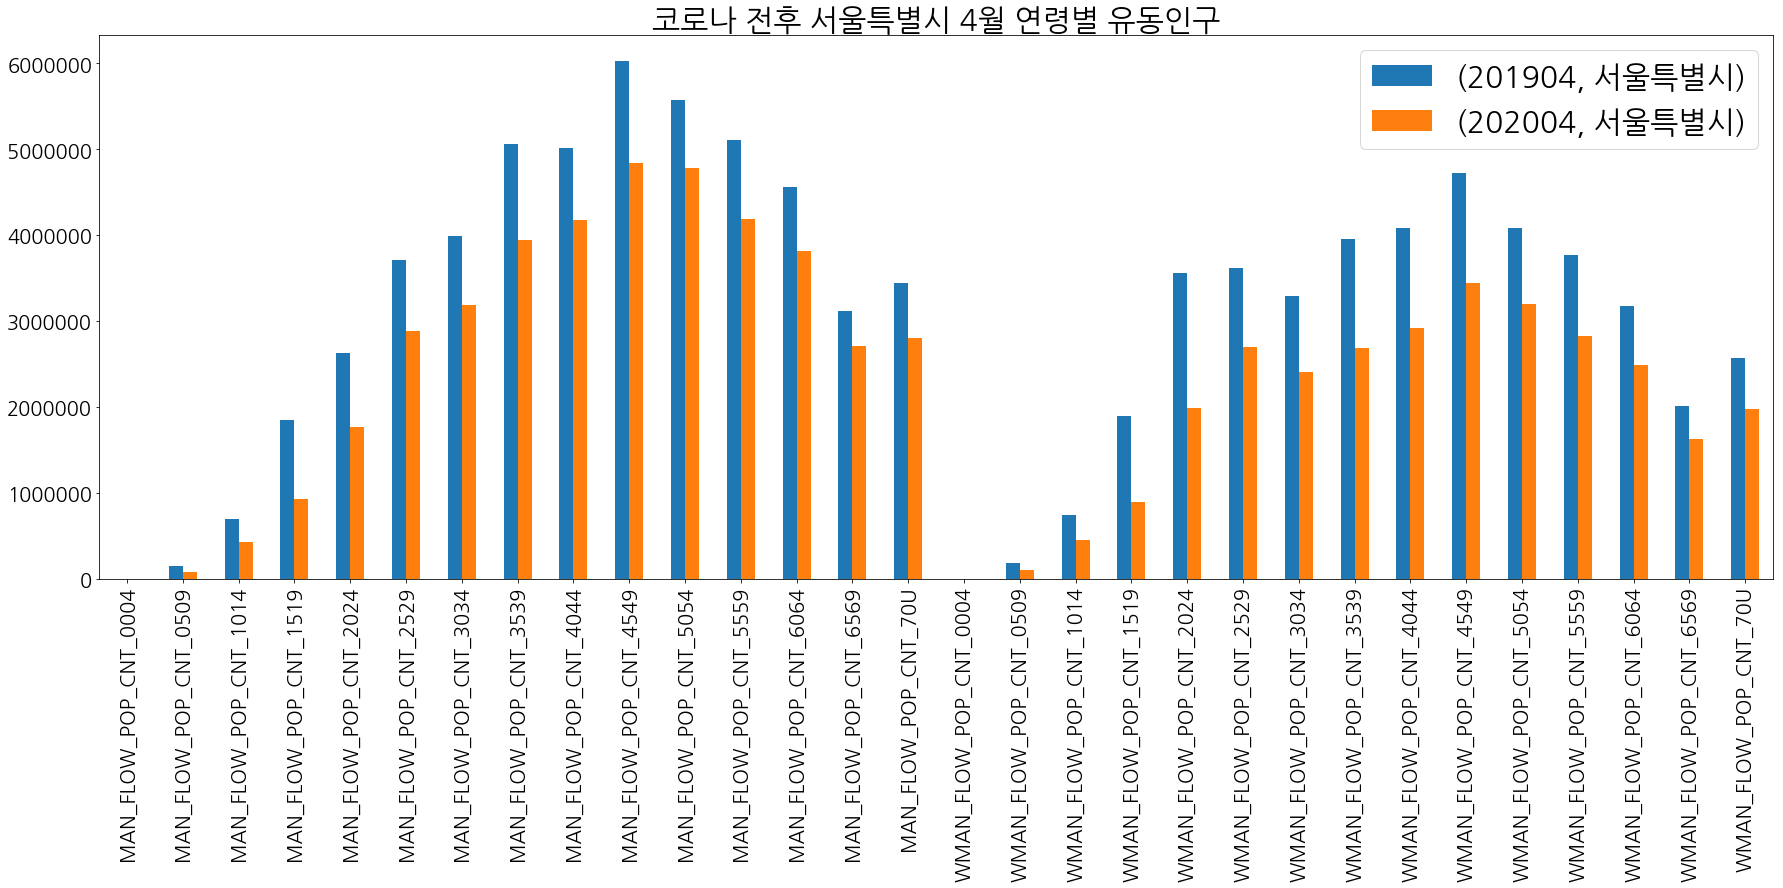

In [105]:
sk_month_move_AGE.T.iloc[:, [5, 13]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 4월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [378]:
start = 5
end = 13

YM = '4월 서울특별시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

4월 서울특별시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
4월 서울특별시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가


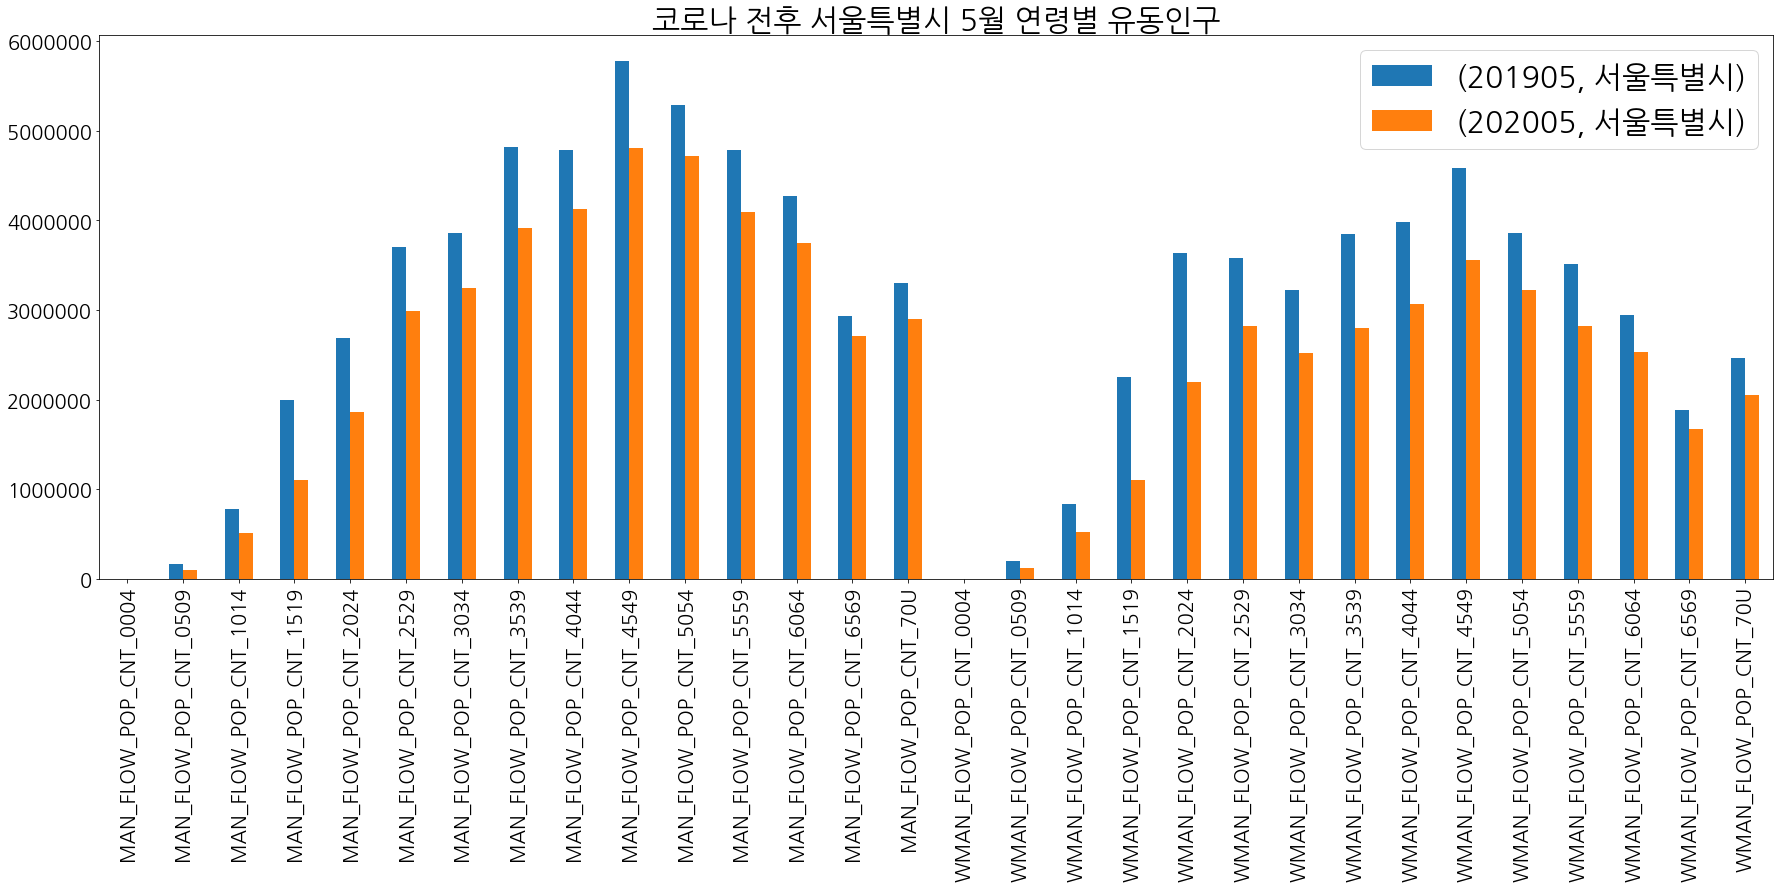

In [106]:
sk_month_move_AGE.T.iloc[:, [7, 15]].plot(kind = 'bar')
plt.title('코로나 전후 서울특별시 5월 연령별 유동인구', fontsize = 30)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 30)

In [379]:
start = 7
end = 15

YM = '5월 서울특별시'

move_dif = sk_month_move_AGE.T.iloc[:, start] - sk_month_move_AGE.T.iloc[:, end]

del move_dif['MAN_FLOW_POP_CNT_0004']
del move_dif['WMAN_FLOW_POP_CNT_0004']

print(f'{YM}의 유동인구 변화량은 {move_dif.abs().idxmin()}연령이 제일 작으며, {move_dif.abs().idxmax()}연령이 제일 크다')

print('===============================================================================')

print(f'{YM}은 {move_dif.idxmax()}의 이동량이 가장 큰 폭으로 감소하였으며, {move_dif.idxmin()}에 가장 큰 폭으로 증가하였다.')

print('===============================================================================')

sep = int(len(move_dif)/2)

man = move_dif[:sep]
woman = move_dif[sep:]

man_down_move = list(map(lambda x : x[-4:], man[man>=0].index.tolist()))
man_up_move = list(map(lambda x : x[-4:], man[man<0].index.tolist()))

woman_down_move = list(map(lambda x : x[-4:], woman[woman>=0].index.tolist()))
woman_up_move = list(map(lambda x : x[-4:], woman[woman<0].index.tolist()))

print(f'남자의 {man_down_move} 연령은 이동량 감소')
print(f'남자의 {man_up_move} 연령은 이동량 증가')

print('===============================================================================')

print(f'여자의 {woman_down_move} 연령은 이동량 감소')
print(f'여자의 {woman_up_move} 연령은 이동량 증가')

5월 서울특별시의 유동인구 변화량은 MAN_FLOW_POP_CNT_0509연령이 제일 작으며, WMAN_FLOW_POP_CNT_2024연령이 제일 크다
5월 서울특별시은 WMAN_FLOW_POP_CNT_2024의 이동량이 가장 큰 폭으로 감소하였으며, MAN_FLOW_POP_CNT_0509에 가장 큰 폭으로 증가하였다.
남자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
남자의 [] 연령은 이동량 증가
여자의 ['0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '_70U'] 연령은 이동량 감소
여자의 [] 연령은 이동량 증가
